In [2]:
#!pip install dython
#!pip install missingno
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from dython import nominal
import missingno as msno




In [3]:
df = pd.read_csv('C:/Users/Federico/Desktop/Data Science/Data Mining/Progetto/Data_Understanding/datasetproject1/DatasetProject1/Train_HR_Employee_Attrition.csv') 

In [4]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,...,3,NaN,1,7,4.0,3,1.0,5,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   float64
 1   Attrition                 1176 non-null   object 
 2   BusinessTravel            1069 non-null   object 
 3   DailyRate                 1176 non-null   int64  
 4   Department                1176 non-null   object 
 5   DistanceFromHome          1176 non-null   int64  
 6   Education                 1176 non-null   int64  
 7   EducationField            1176 non-null   object 
 8   EnvironmentSatisfaction   1176 non-null   int64  
 9   Gender                    1117 non-null   object 
 10  HourlyRate                1176 non-null   int64  
 11  JobInvolvement            1176 non-null   int64  
 12  JobLevel                  1176 non-null   int64  
 13  JobRole                   1176 non-null   object 
 14  JobSatis

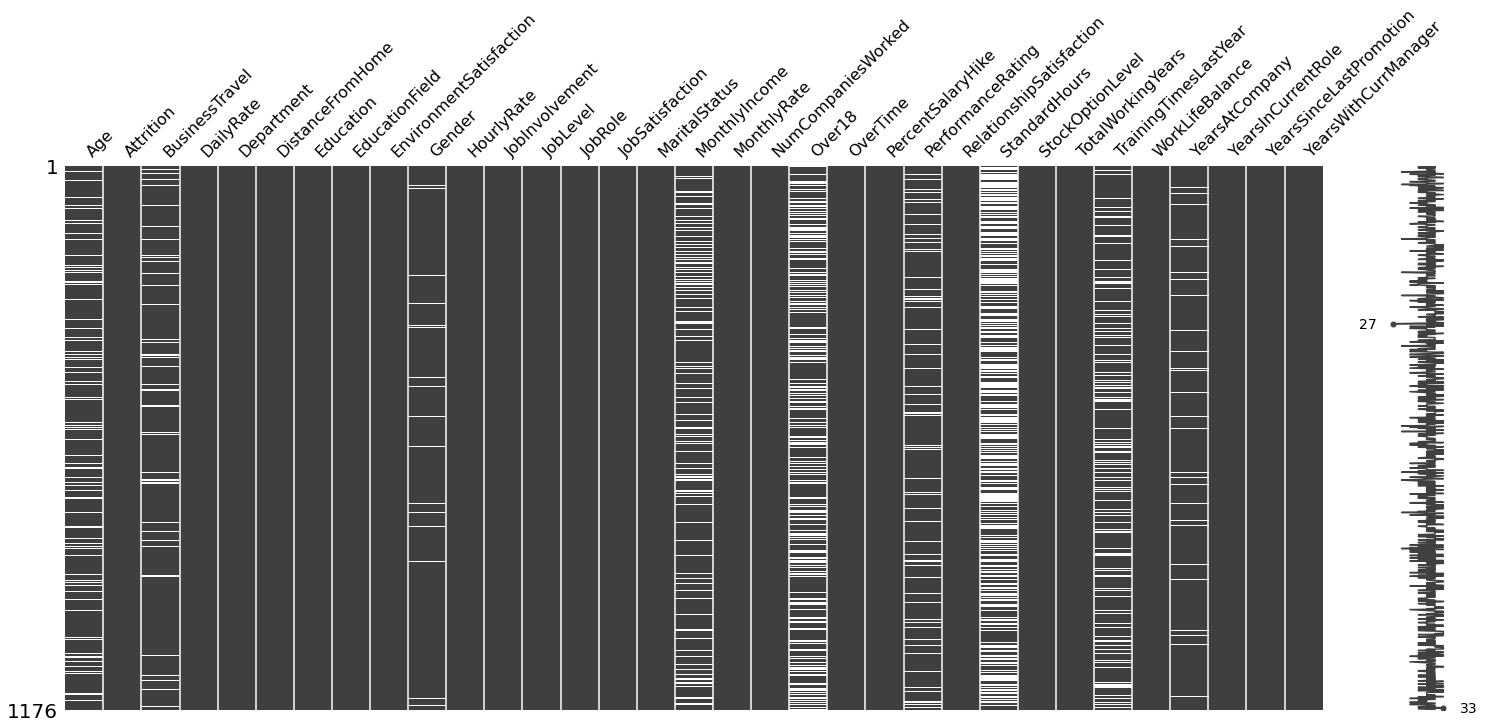

In [6]:
msno.matrix(df)

In [7]:
df.isnull().sum()

Age                         176
Attrition                     0
BusinessTravel              107
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                       59
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               213
MonthlyRate                   0
NumCompaniesWorked            0
Over18                      372
OverTime                      0
PercentSalaryHike             0
PerformanceRating           138
RelationshipSatisfaction      0
StandardHours               570
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear       233
WorkLifeBalance               0
YearsAtCompany               60
YearsInCurrentRole            0
YearsSin

In [8]:
df['Over18'].value_counts()

Y    804
Name: Over18, dtype: int64

In [9]:
df['StandardHours'].value_counts()

80.0    606
Name: StandardHours, dtype: int64

In [10]:
df=df.drop(columns=["Over18"],axis=1)
df=df.drop(columns=["StandardHours"],axis=1)

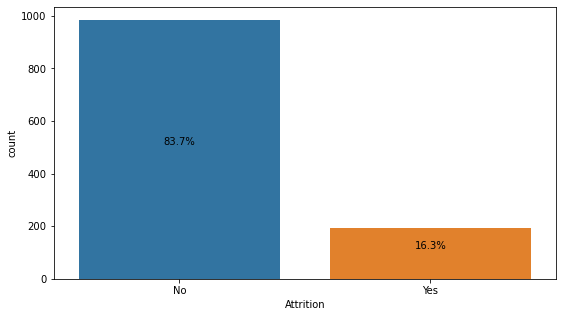

In [11]:
plt.figure(figsize=(9,5));
ax=sns.countplot(df["Attrition"]);

total = len(df['Attrition'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, 
                    xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.show();

In [12]:
df['Gender'].value_counts()

Male      664
Female    453
Name: Gender, dtype: int64

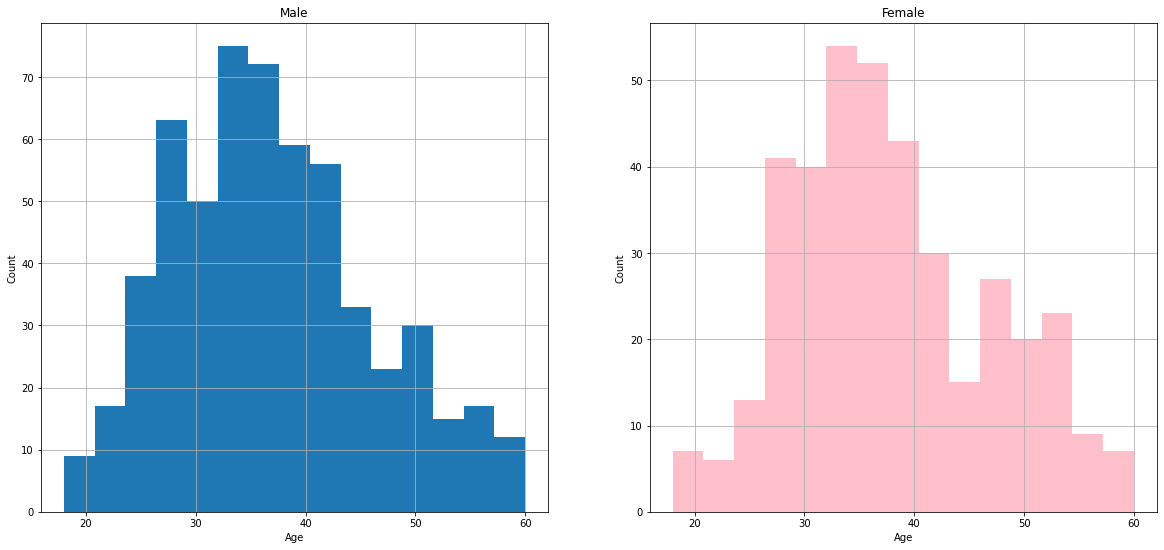

In [13]:
plt.figure(figsize=(20, 9))

plt.subplot(1, 2, 1)
df[df['Gender'] == "Male"]['Age'].hist(bins=15)
plt.title("Male")
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df[df['Gender'] == "Female"]['Age'].hist(bins=15,color='pink')
plt.title("Female")
    
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [14]:
df[df['Gender'] == "Female"]['Age'].mean()


37.75968992248062

In [15]:
df[df['Gender'] == "Male"]['Age'].mean()


36.89982425307557

<function matplotlib.pyplot.show(*args, **kw)>

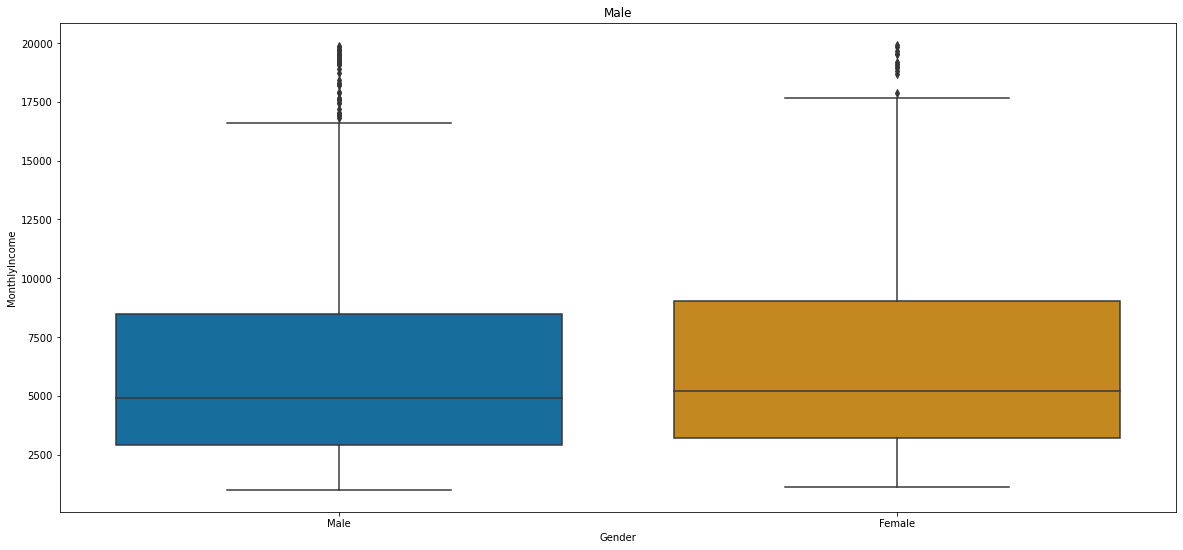

In [16]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Gender',y='MonthlyIncome', data=df, palette="colorblind")
plt.title("Male")
plt.show

In [17]:
df[df['Gender'] == "Female"]['MonthlyIncome'].mean()

6709.543010752688

In [18]:
df[df['Gender'] == "Male"]['MonthlyIncome'].mean()

6487.651933701657

<function matplotlib.pyplot.show(*args, **kw)>

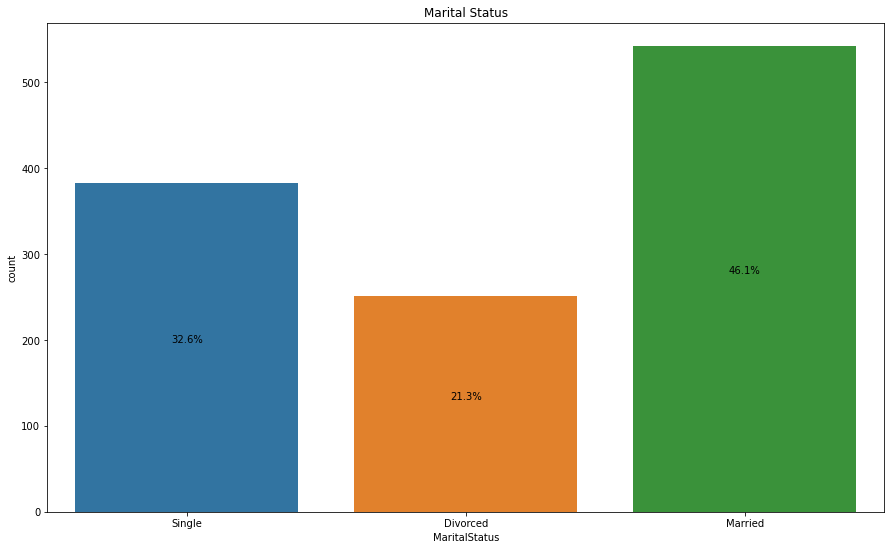

In [16]:
plt.figure(figsize=(15, 9))

ax=sns.countplot(df['MaritalStatus'])

total = len(df['MaritalStatus'])
for p in ax.patches:
    
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
#fig = plt.gcf()
#fig.set_size_inches(10,10)
plt.title('Marital Status')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

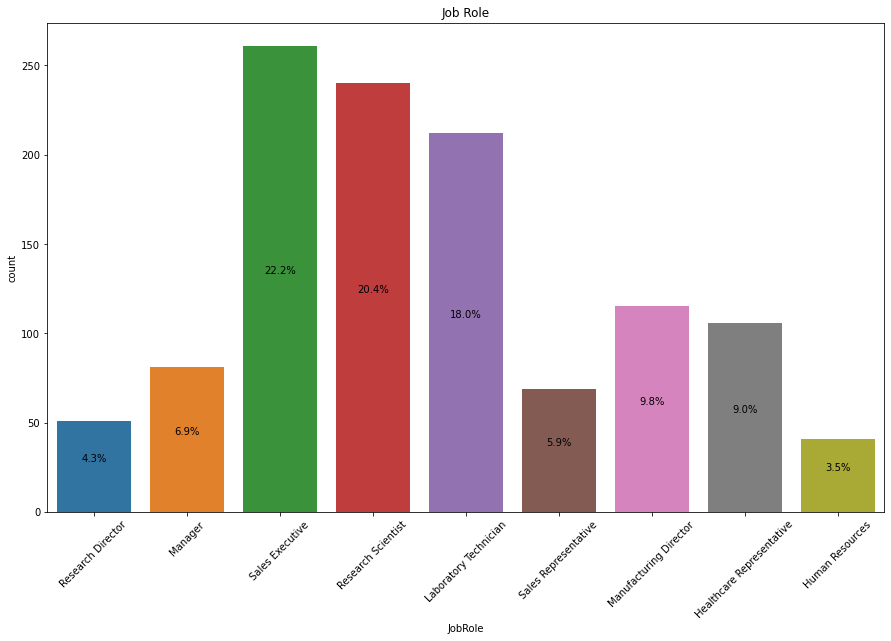

In [17]:
plt.figure(figsize=(15, 9))

ax=sns.countplot(df['JobRole'])
total = len(df['JobRole'])
for p in ax.patches:
    
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
plt.title('Job Role')
plt.xticks(rotation=45);
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

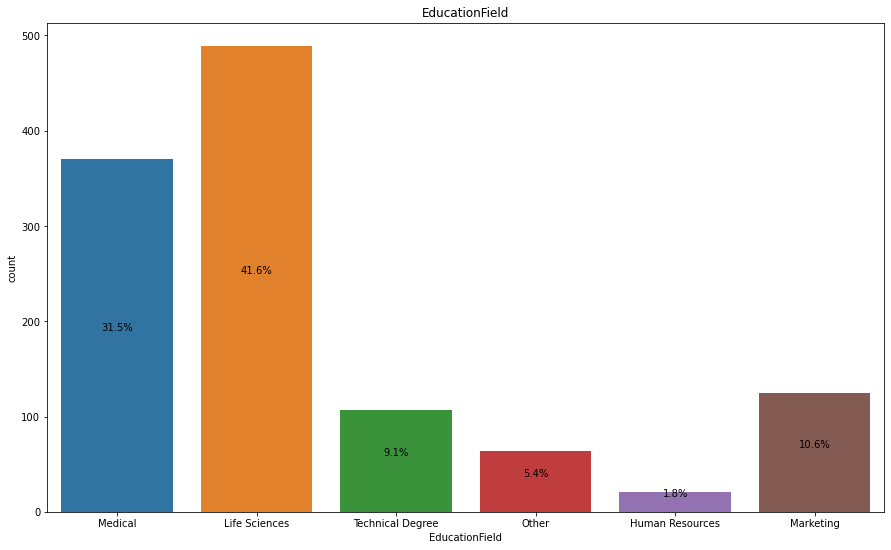

In [18]:
plt.figure(figsize=(15, 9))

ax=sns.countplot(df['EducationField'])
total = len(df['EducationField'])
for p in ax.patches:
    
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
plt.title('EducationField')
#plt.xticks(rotation=90);
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

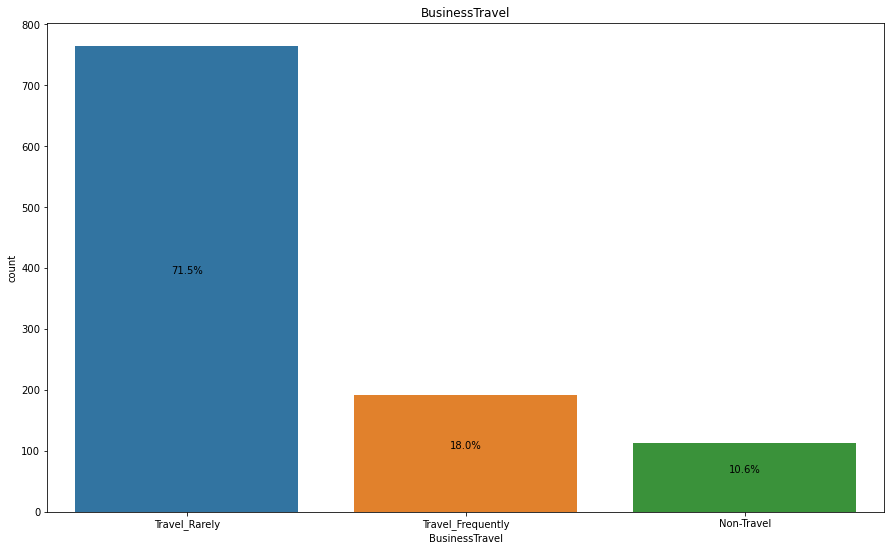

In [23]:
plt.figure(figsize=(15, 9))
ax=sns.countplot(df['BusinessTravel'])
total = len(df['BusinessTravel'])-107
for p in ax.patches:
    
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
plt.title('BusinessTravel')
#plt.xticks(rotation=90);
plt.show


C:\Users\Federico\anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Federico\anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1080x648 with 0 Axes>

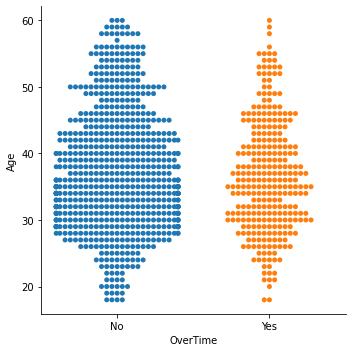

In [23]:
plt.figure(figsize=(15, 9))
sns.catplot(x="OverTime", y="Age", kind="swarm", data=df);
plt.show


In [24]:
df['OverTime'].value_counts()

No     838
Yes    338
Name: OverTime, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

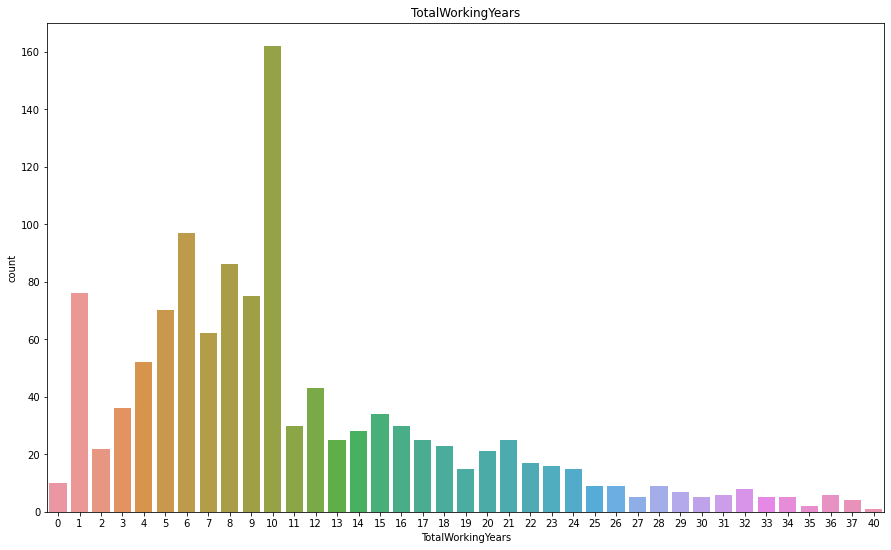

In [25]:
plt.figure(figsize=(15, 9))
sns.countplot(df['TotalWorkingYears'])
plt.title('TotalWorkingYears')
#plt.xticks(rotation=90);
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

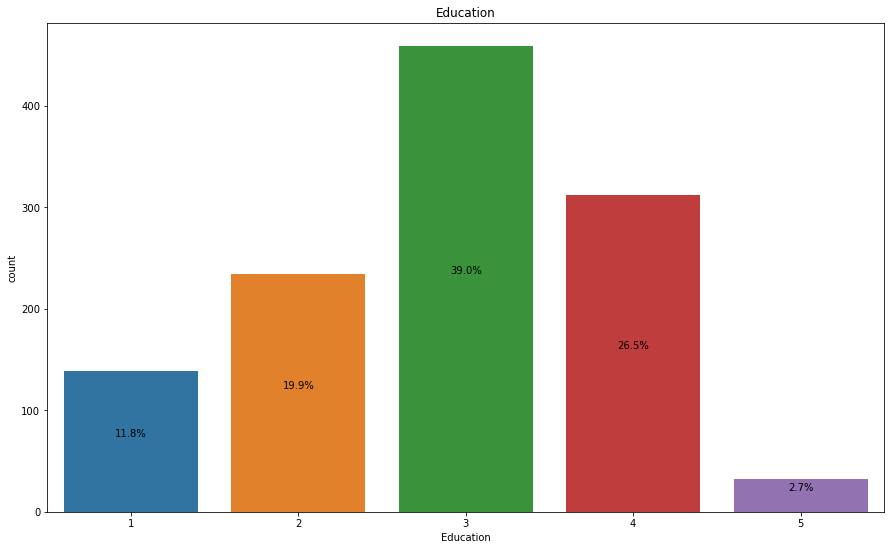

In [20]:
plt.figure(figsize=(15, 9))
ax=sns.countplot(df['Education'])
total = len(df['BusinessTravel'])
for p in ax.patches:
    
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
plt.title('Education')
#plt.xticks(rotation=90);
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

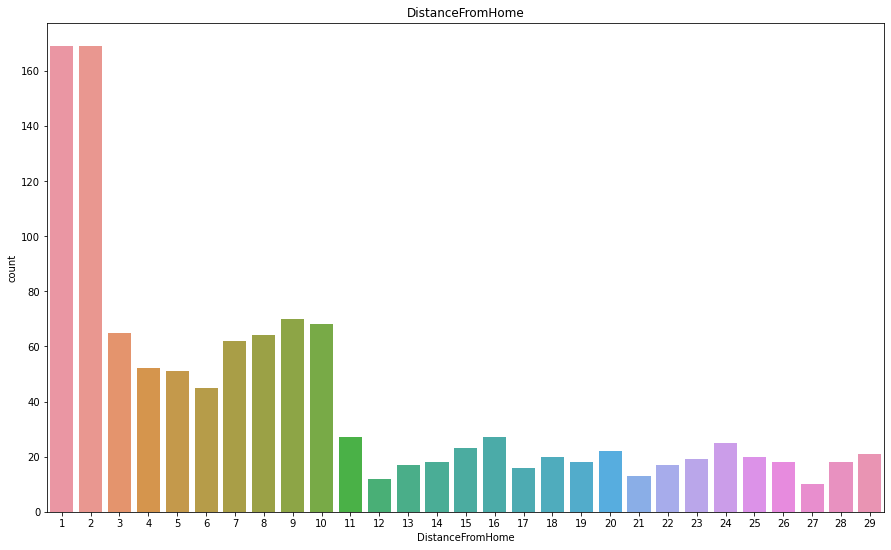

In [27]:
plt.figure(figsize=(15, 9))
sns.countplot(df['DistanceFromHome'])
plt.title('DistanceFromHome')
#plt.xticks(rotation=90);
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

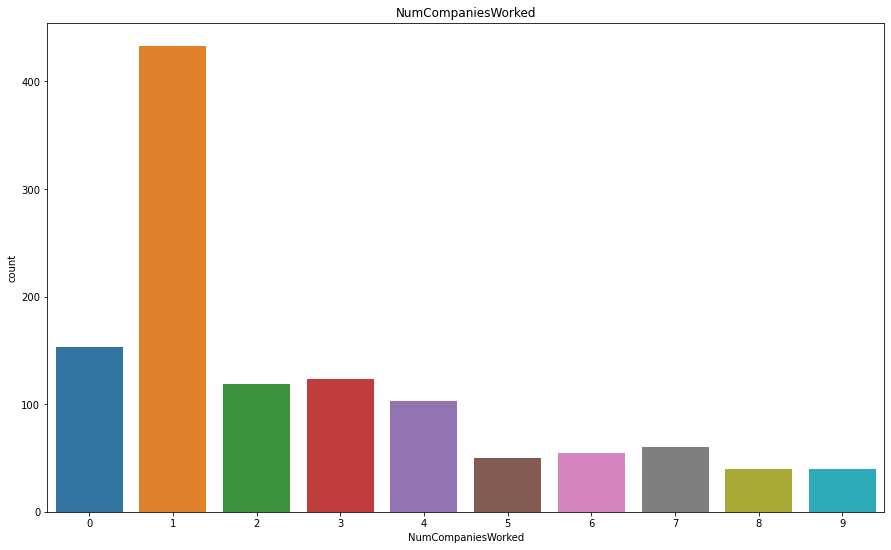

In [28]:
plt.figure(figsize=(15, 9))
sns.countplot(df['NumCompaniesWorked'])
plt.title('NumCompaniesWorked')
#plt.xticks(rotation=90);
plt.show


In [29]:
age=pd.DataFrame(df.groupby("Age")[["MonthlyIncome","Education","JobLevel","JobInvolvement","PerformanceRating","JobSatisfaction","EnvironmentSatisfaction","RelationshipSatisfaction","WorkLifeBalance","DailyRate","MonthlyRate"]].mean())
age["Count"]=df.Age.value_counts(dropna=False)
age.reset_index(level=0, inplace=True)
age = age.astype({"Age": int})
age.head()

,Age,MonthlyIncome,Education,JobLevel,JobInvolvement,PerformanceRating,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,DailyRate,MonthlyRate,Count
0,18,1621.400000,2.833333,1.666667,2.833333,3.000000,3.000000,2.333333,2.833333,2.666667,777.500000,11771.166667,6
1,19,2120.250000,2.500000,1.750000,2.750000,3.333333,2.250000,2.750000,2.250000,2.750000,817.250000,13016.250000,4
2,20,2384.666667,3.428571,1.857143,3.000000,3.000000,2.571429,3.000000,2.571429,2.714286,792.000000,12836.428571,7
3,21,2480.000000,2.857143,2.571429,2.857143,3.142857,2.428571,2.857143,2.857143,2.714286,783.285714,14708.571429,7
4,22,2654.200000,2.000000,1.714286,2.714286,3.142857,2.571429,2.857143,2.857143,2.714286,654.428571,15734.571429,7


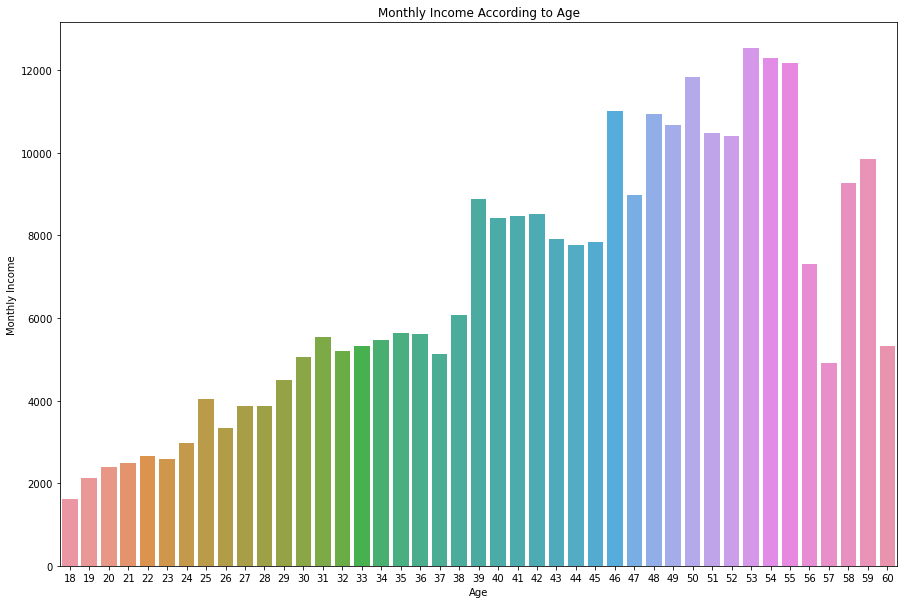

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x=age['Age'],y=age['MonthlyIncome'])
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Monthly Income According to Age")
plt.show()

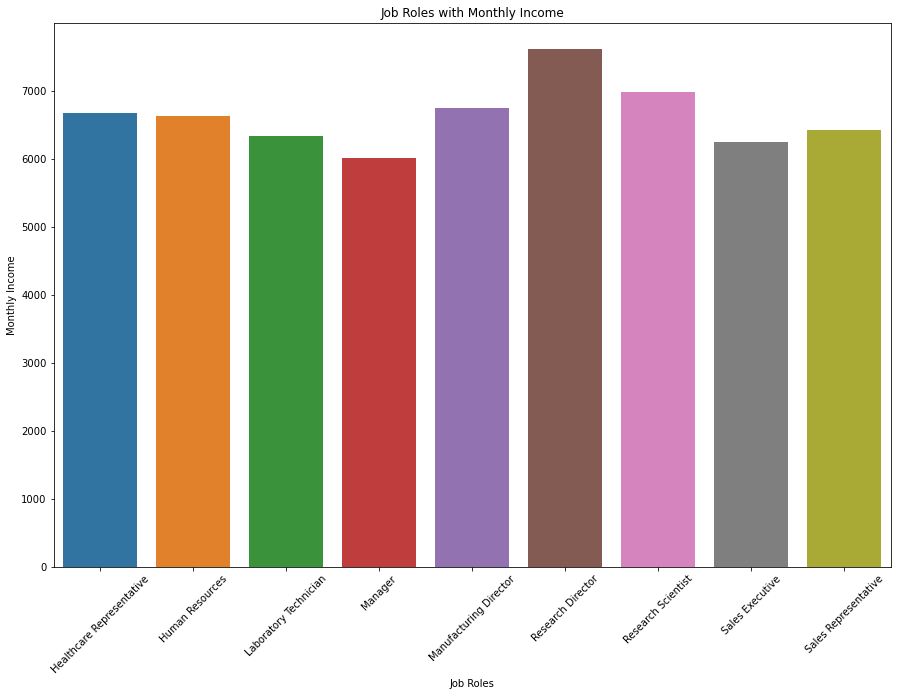

In [27]:
income=pd.DataFrame(df.groupby("JobRole").MonthlyIncome.mean())

plt.figure(figsize=(15,10))
ax=sns.barplot(x=income.index,y=income.MonthlyIncome)
plt.xticks(rotation=45)
plt.xlabel("Job Roles")
plt.ylabel("Monthly Income")
plt.title("Job Roles with Monthly Income")
plt.show()

In [32]:
df[df['JobRole']=='Manager']['MonthlyIncome'].mean()

6013.478873239436

In [28]:
income.tail()

,MonthlyIncome
JobRole,
Manufacturing Director,6747.900000
Research Director,7611.772727
Research Scientist,6975.304124
Sales Executive,6247.047170
Sales Representative,6416.155172


Text(0.5, 1.0, 'Education Field Counts')

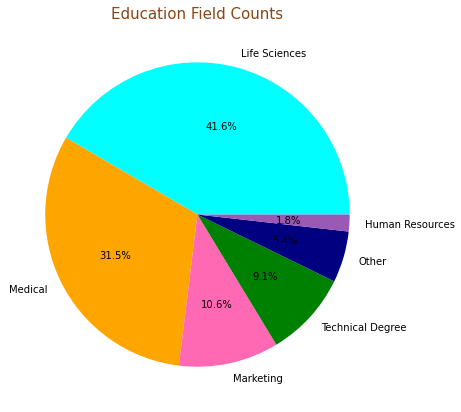

In [34]:
labels=df.EducationField.value_counts().index
colors=["cyan","orange","hotpink","green","navy","#9b59b6"]
#explode=[0,0,0,0,0,0]
sizes=df.EducationField.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Education Field Counts",color="saddlebrown",fontsize=15)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   float64
 1   Attrition                 1176 non-null   object 
 2   BusinessTravel            1069 non-null   object 
 3   DailyRate                 1176 non-null   int64  
 4   Department                1176 non-null   object 
 5   DistanceFromHome          1176 non-null   int64  
 6   Education                 1176 non-null   int64  
 7   EducationField            1176 non-null   object 
 8   EnvironmentSatisfaction   1176 non-null   int64  
 9   Gender                    1117 non-null   object 
 10  HourlyRate                1176 non-null   int64  
 11  JobInvolvement            1176 non-null   int64  
 12  JobLevel                  1176 non-null   int64  
 13  JobRole                   1176 non-null   object 
 14  JobSatis

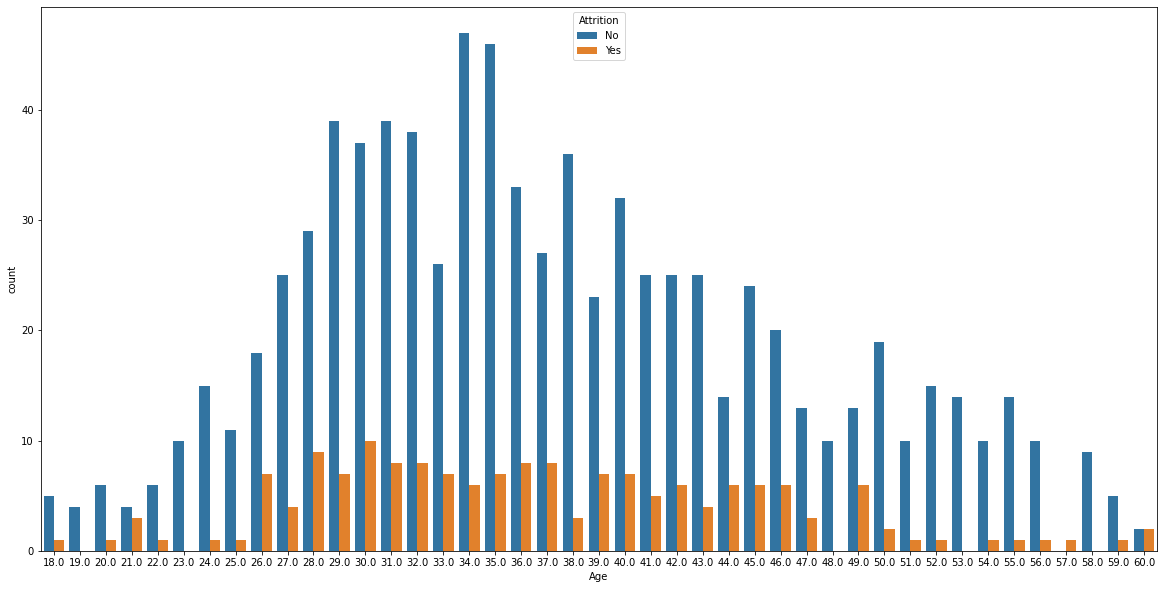

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(df['Age'],hue=df['Attrition'])
plt.show()

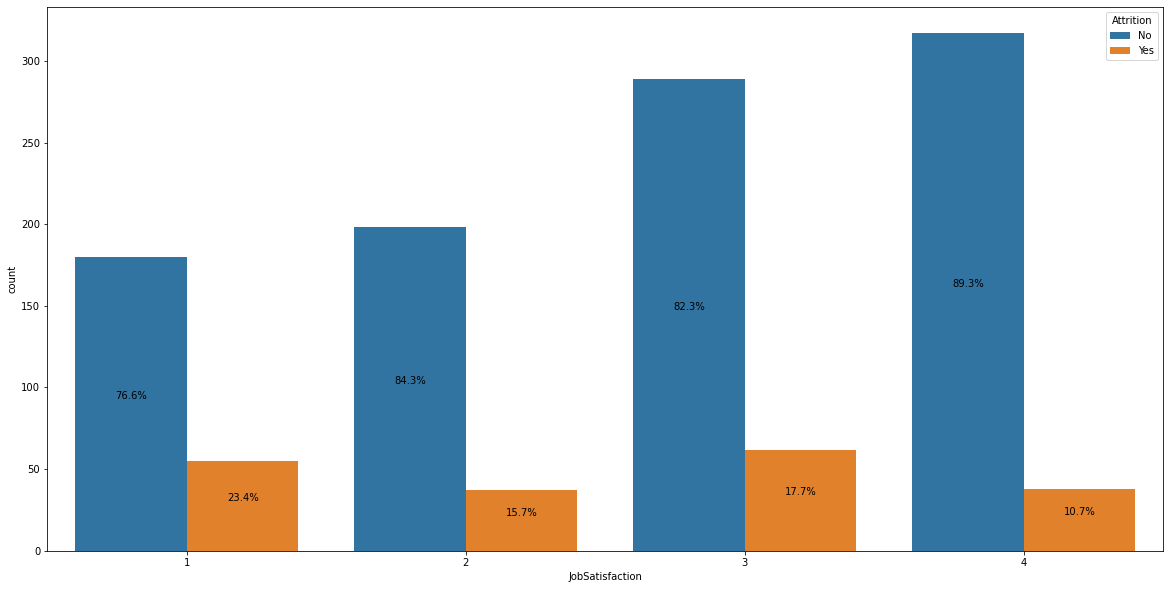

In [75]:

plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['JobSatisfaction'],hue=df['Attrition'])
i=1
for p in ax.patches:
    total = len(df[df['JobSatisfaction']==i])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    i=i+1

    if i>4:
        i=1
plt.show()

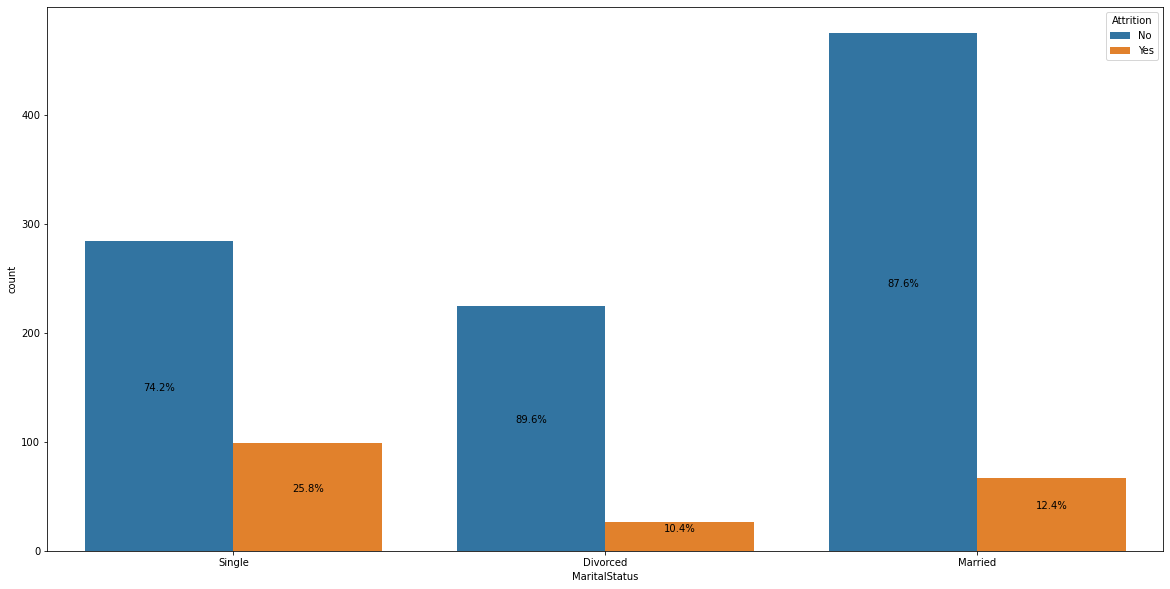

In [128]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['MaritalStatus'],hue=df['Attrition'])
i=1
value1="Single"
value2="Divorced"
value3="Married"

for p in ax.patches:
    if i==1:
        value=value1
    elif i==2:
        value=value2
    else:
        value=value3
    total = len(df[df['MaritalStatus']==value])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    i=i+1

    if i>3:
        i=1
   
        
plt.show()

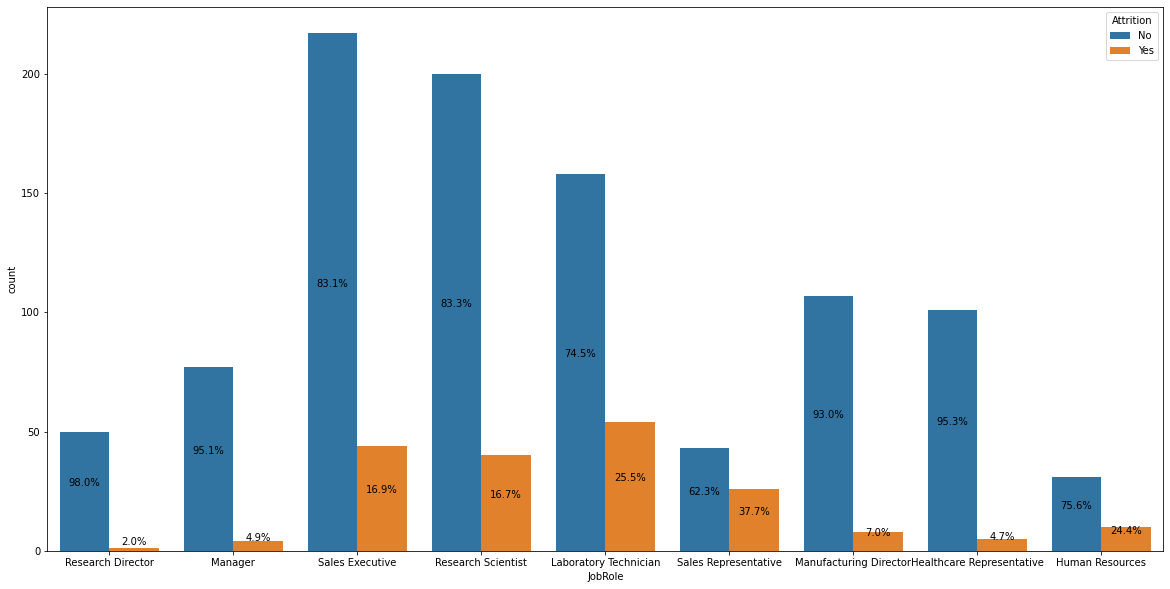

In [98]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['JobRole'],hue=df['Attrition'])
i=0

value=df['JobRole'].unique()
n=len(value)

for p in ax.patches:
    total = len(df[df['JobRole']==value[i]])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    i=i+1
    
    if i>=n:
        i=0
   
        
plt.show()


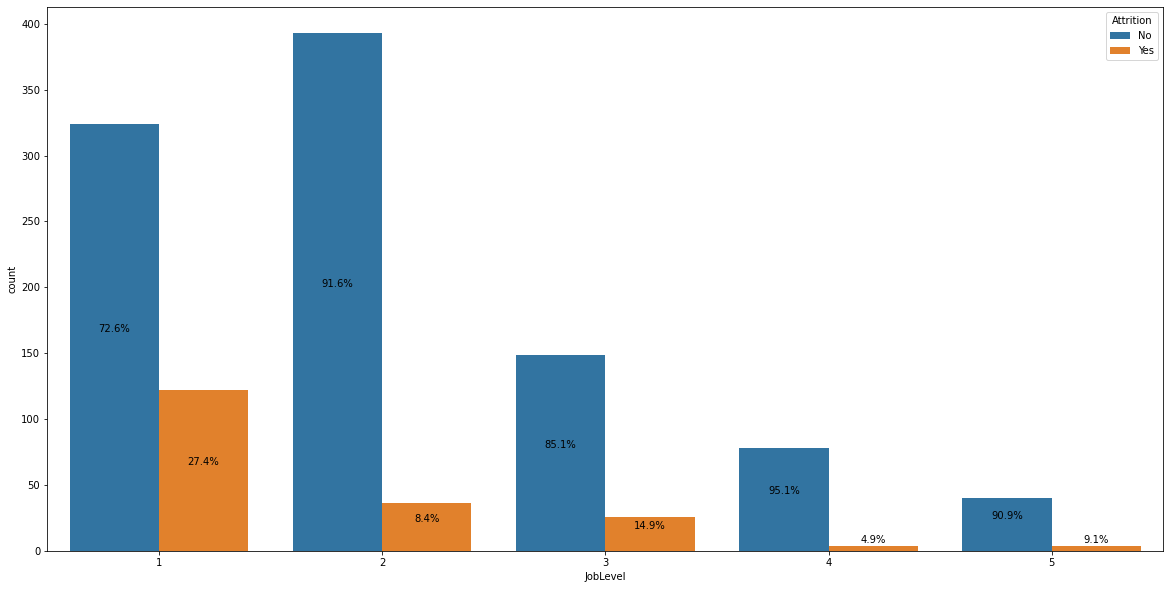

In [103]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['JobLevel'],hue=df['Attrition'])
i=1


for p in ax.patches:
    total = len(df[df['JobLevel']==i])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    i=i+1
    

    if i>5:
        i=1
        
plt.show()



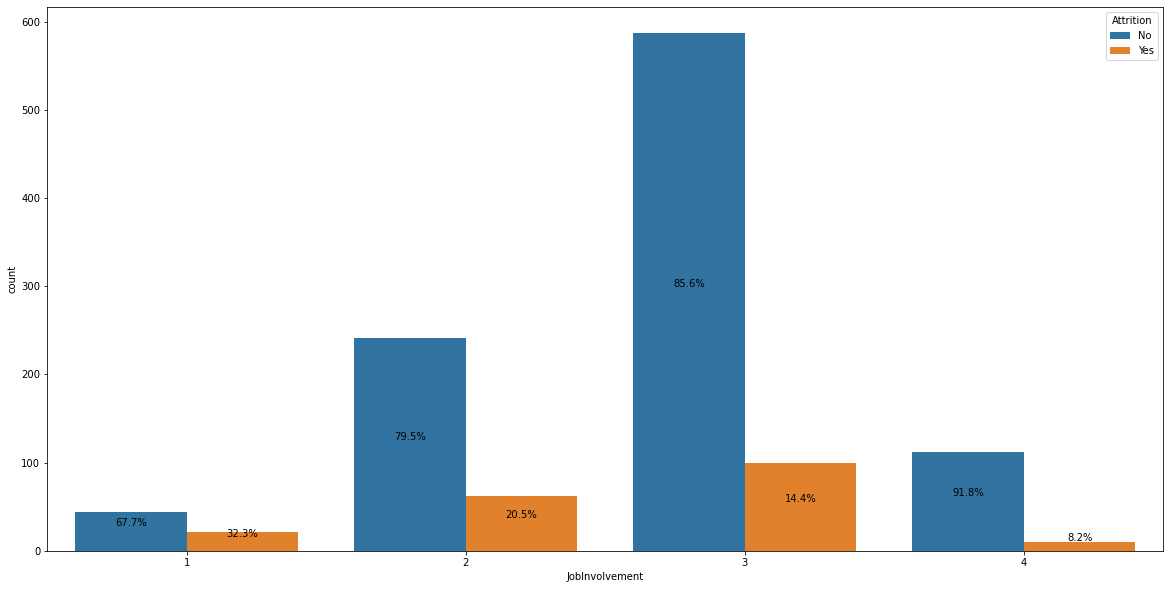

In [105]:

plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['JobInvolvement'],hue=df['Attrition'])
i=1


for p in ax.patches:
    total = len(df[df['JobInvolvement']==i])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    i=i+1
    

    if i>4:
        i=1
        
plt.show()


In [107]:
df_left=df[df['Attrition']=='Yes']
df_stayes=df[df['Attrition']=='No']

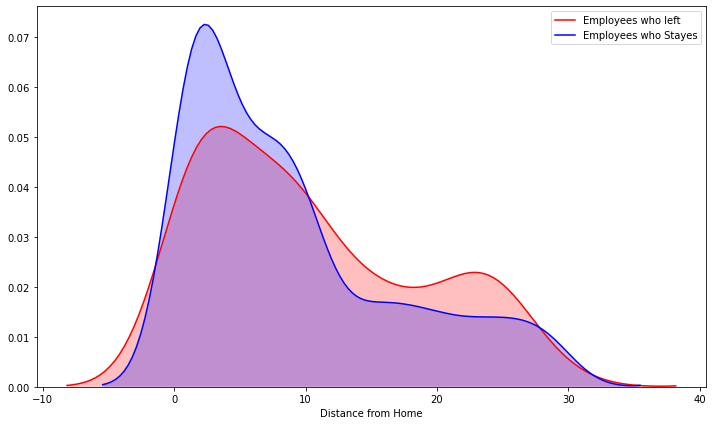

In [108]:
plt.figure(figsize=(12,7))

sns.kdeplot(df_left['DistanceFromHome'],label='Employees who left',shade='True',color='r')
sns.kdeplot(df_stayes['DistanceFromHome'],label='Employees who Stayes',shade='True',color='b')
plt.xlabel('Distance from Home')
plt.show()

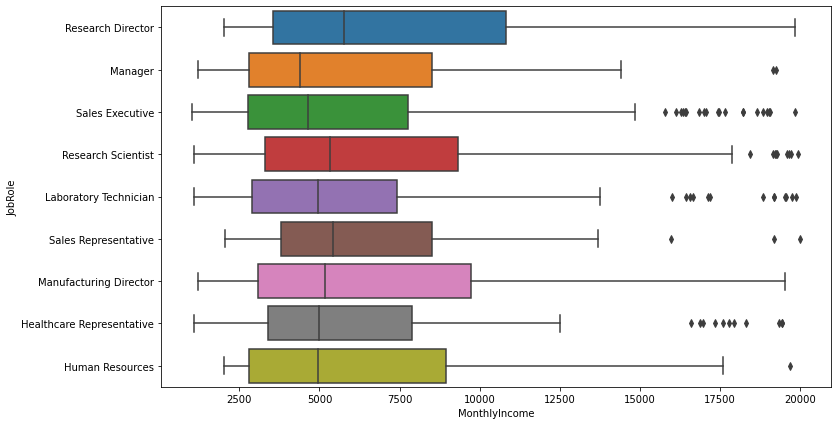

In [127]:
plt.figure(figsize=(12,7))

sns.boxplot(x='MonthlyIncome',y='JobRole',data=df)
plt.show()

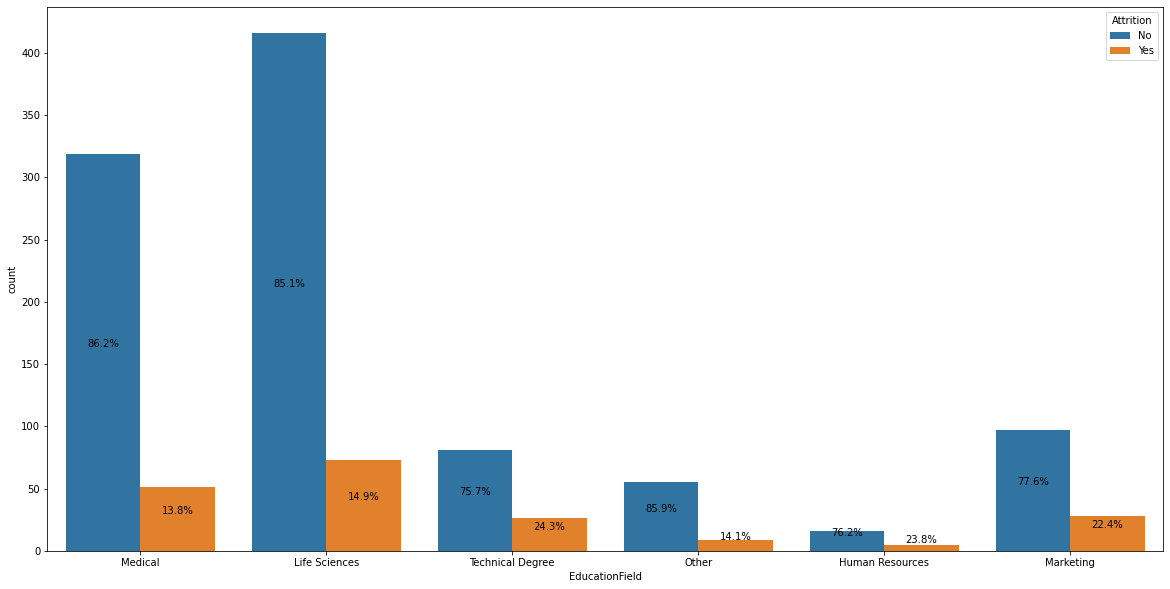

In [130]:

plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['EducationField'],hue=df['Attrition'])
i=0

value=df['EducationField'].unique()
n=len(value)

for p in ax.patches:
    total = len(df[df['EducationField']==value[i]])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    i=i+1
    
    if i>=n:
        i=0
   
        
plt.show()

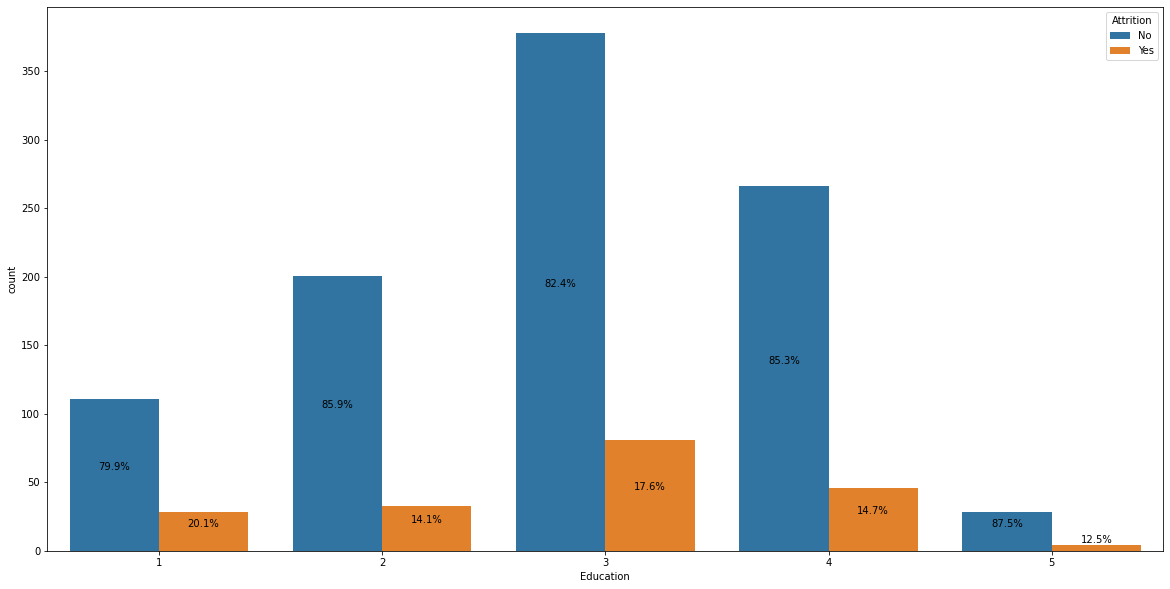

In [132]:

plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['Education'],hue=df['Attrition'])
i=1


for p in ax.patches:
    total = len(df[df['Education']==i])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    i=i+1
    

    if i>5:
        i=1
        
plt.show()

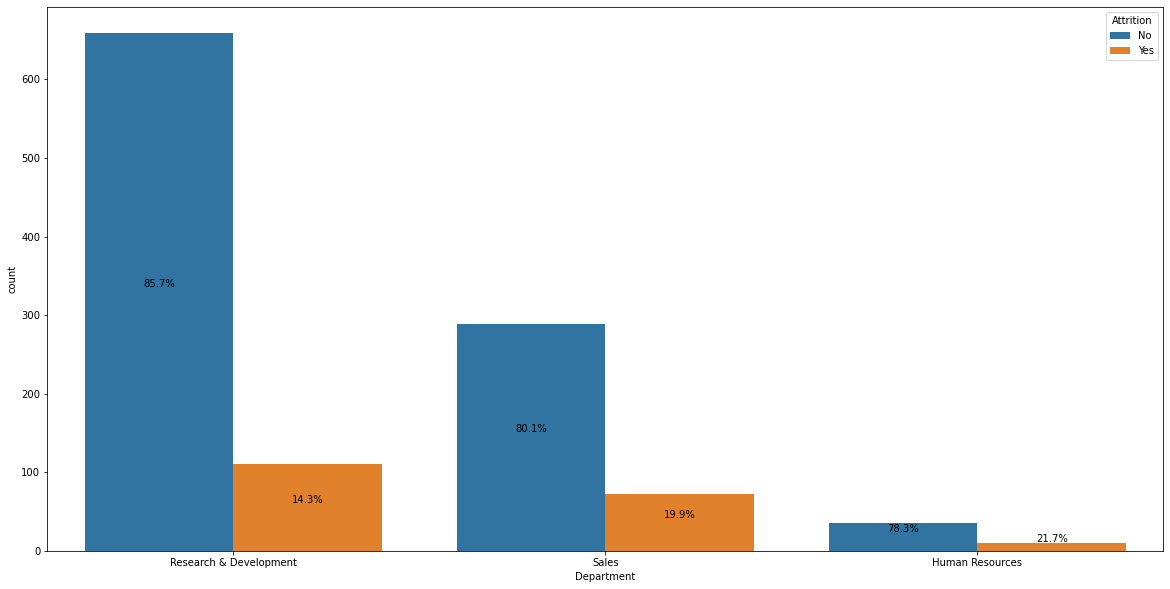

In [133]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['Department'],hue=df['Attrition'])
i=0

value=df['Department'].unique()
n=len(value)

for p in ax.patches:
    total = len(df[df['Department']==value[i]])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    i=i+1
    
    if i>=n:
        i=0
   
        
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

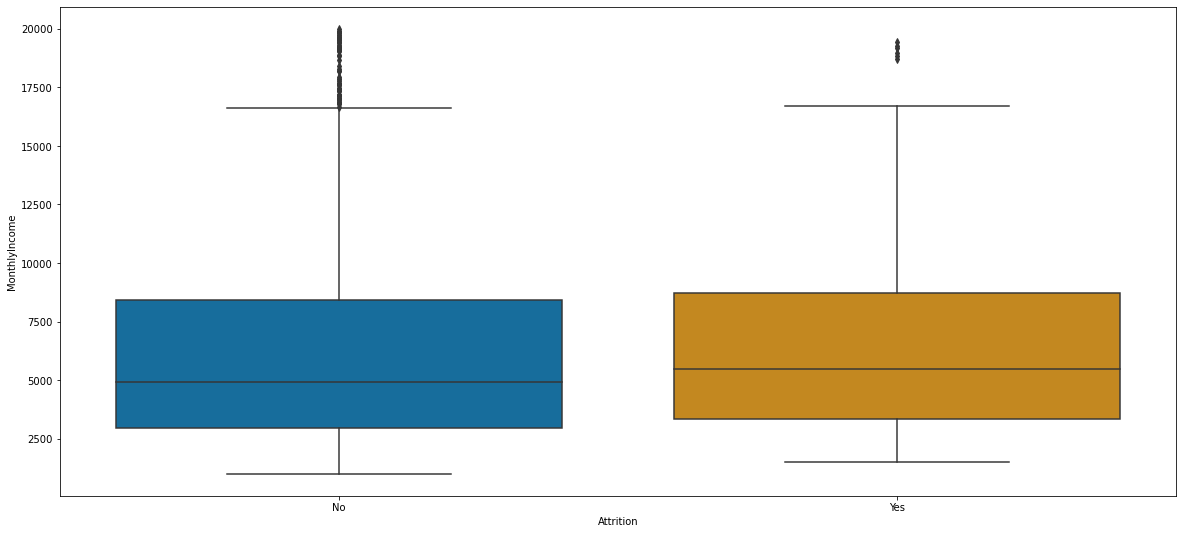

In [137]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='MonthlyIncome', data=df, palette="colorblind")
plt.show

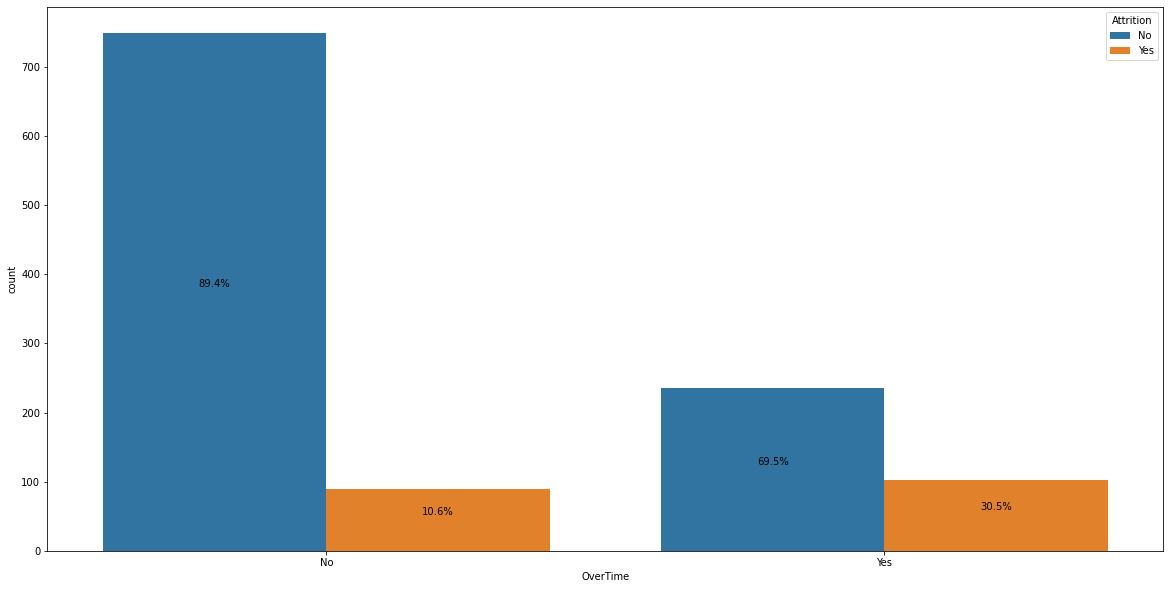

In [138]:

plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['OverTime'],hue=df['Attrition'])
i=0

value=df['OverTime'].unique()
n=len(value)

for p in ax.patches:
    total = len(df[df['OverTime']==value[i]])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    i=i+1
    
    if i>=n:
        i=0
   
        
plt.show()

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   float64
 1   Attrition                 1176 non-null   object 
 2   BusinessTravel            1069 non-null   object 
 3   DailyRate                 1176 non-null   int64  
 4   Department                1176 non-null   object 
 5   DistanceFromHome          1176 non-null   int64  
 6   Education                 1176 non-null   int64  
 7   EducationField            1176 non-null   object 
 8   EnvironmentSatisfaction   1176 non-null   int64  
 9   Gender                    1117 non-null   object 
 10  HourlyRate                1176 non-null   int64  
 11  JobInvolvement            1176 non-null   int64  
 12  JobLevel                  1176 non-null   int64  
 13  JobRole                   1176 non-null   object 
 14  JobSatis

Travel_Rarely
Travel_Frequently
nan
Non-Travel


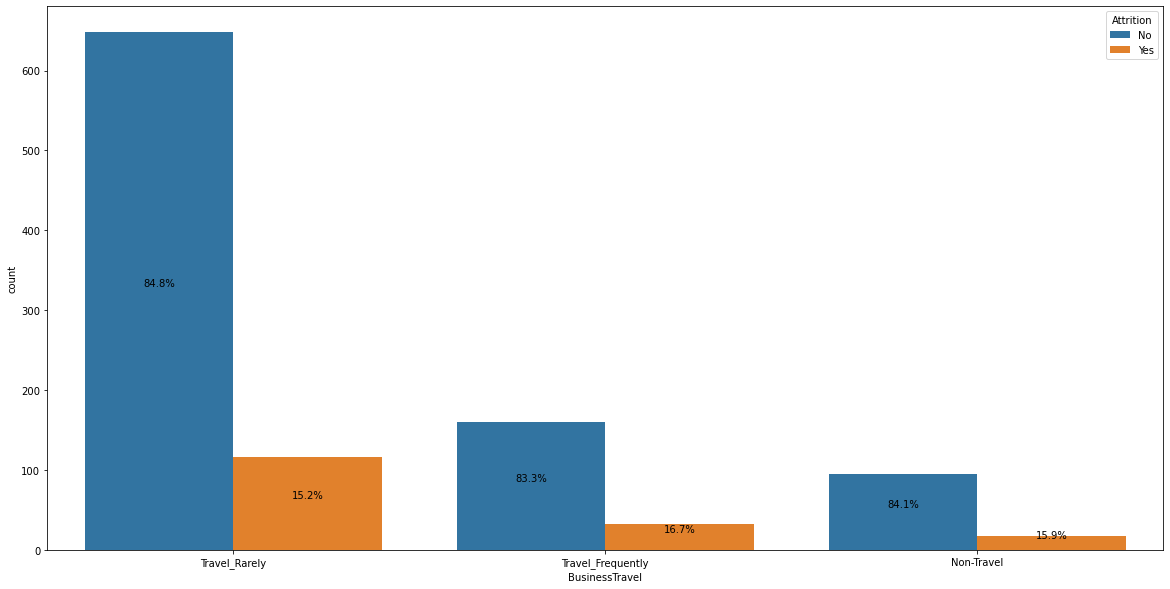

In [147]:

plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['BusinessTravel'],hue=df['Attrition'])
i=0

value=df['BusinessTravel'].unique()
n=len(value)
print(value[0])
print(value[1])
print(value[2])
print(value[3])

for p in ax.patches:
    total = len(df[df['BusinessTravel']==value[i]])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    i=i+1
    
    if i>=n:
        i=0
    if i==2:
        i=i+1
        
plt.show()

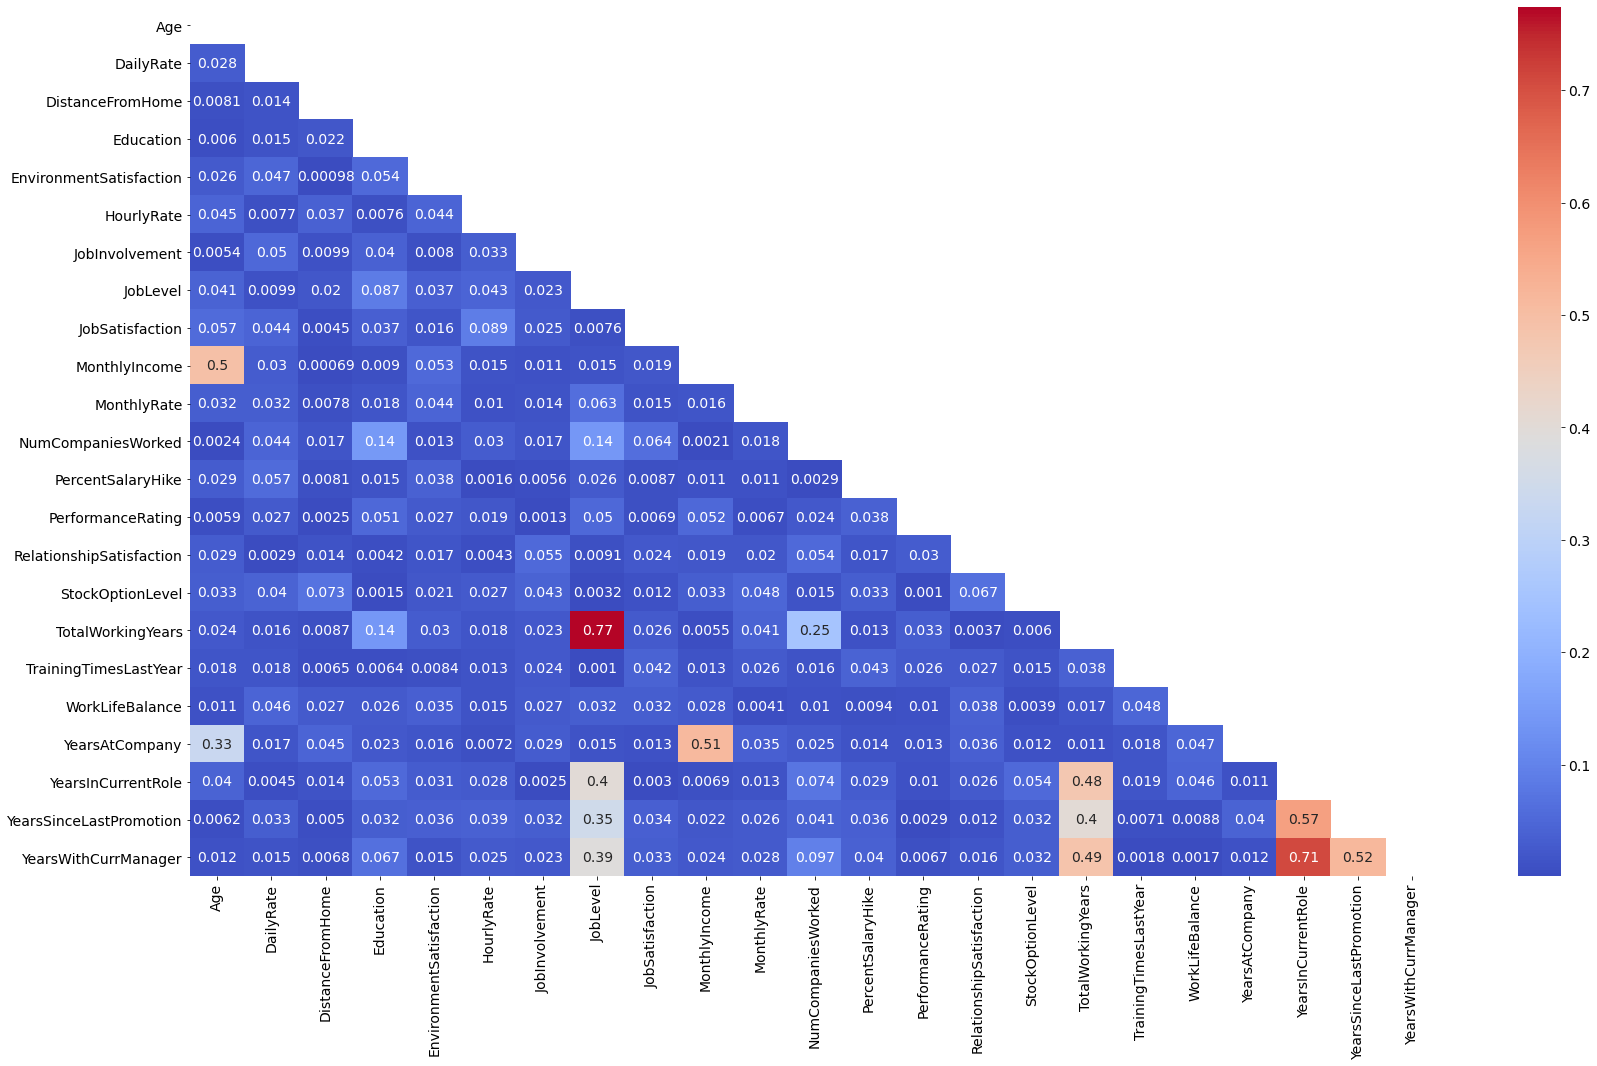

In [158]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(28,16))
corr=df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x720 with 0 Axes>

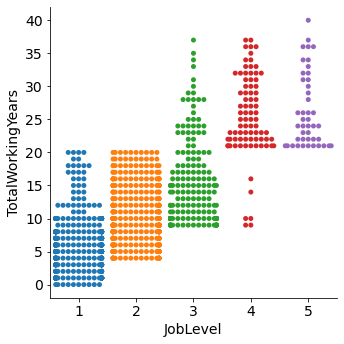

In [156]:
plt.figure(figsize=(20,10))
sns.catplot(x="JobLevel", y="TotalWorkingYears", kind="swarm", data=df);
plt.show


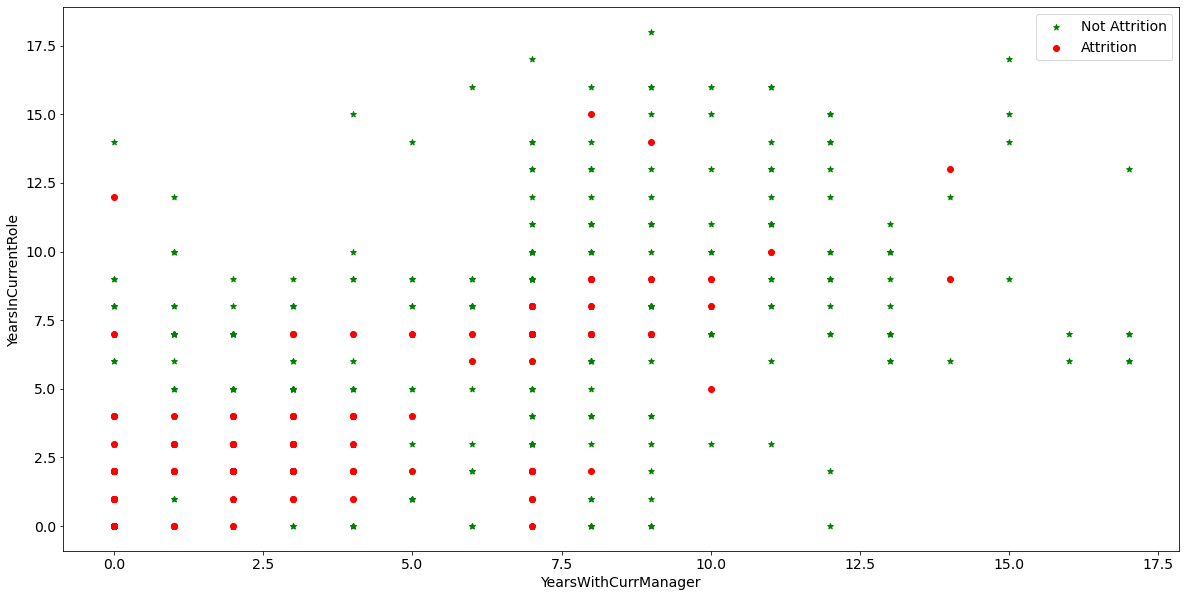

In [164]:
plt.figure(figsize=(20,10))

plt.scatter(df[df['Attrition'] == "No"]['YearsWithCurrManager'], 
            df[df['Attrition'] == "No"]['YearsInCurrentRole'], color='g', marker='*', label='Not Attrition')
plt.scatter(df[df['Attrition'] == "Yes"]['YearsWithCurrManager'], 
            df[df['Attrition'] == "Yes"]['YearsInCurrentRole'], color='r',label='Attrition')
plt.xlabel('YearsWithCurrManager')
plt.ylabel('YearsInCurrentRole')
plt.legend()
plt.show()

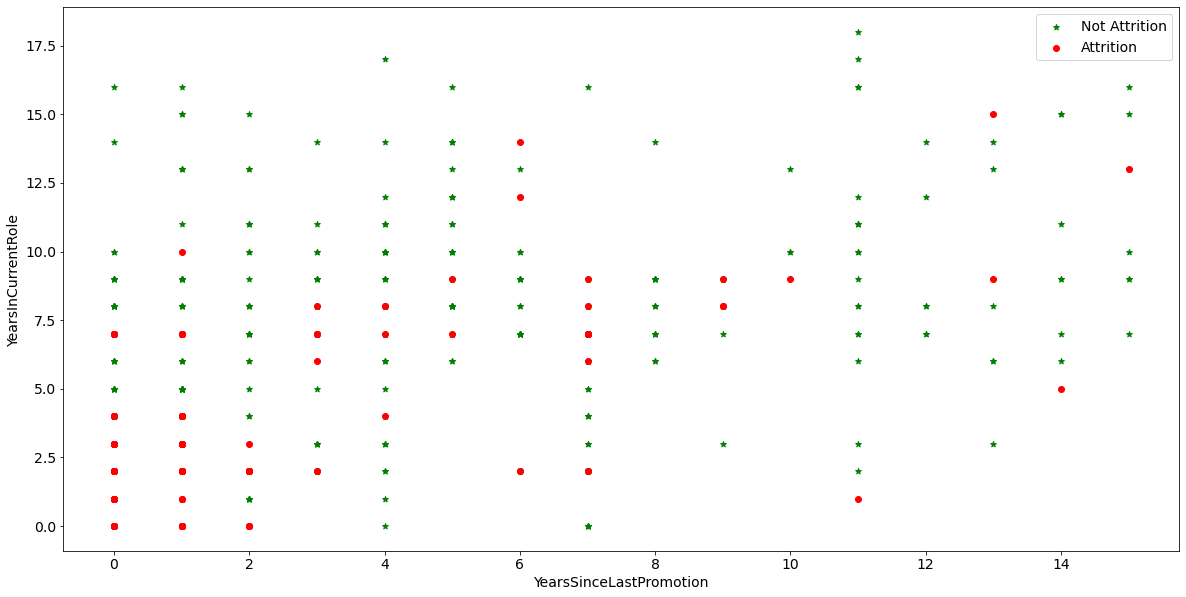

In [161]:
plt.figure(figsize=(20,10))

plt.scatter(df[df['Attrition'] == "No"]['YearsSinceLastPromotion'], 
            df[df['Attrition'] == "No"]['YearsInCurrentRole'], color='g', marker='*', label='Not Attrition')
plt.scatter(df[df['Attrition'] == "Yes"]['YearsSinceLastPromotion'], 
            df[df['Attrition'] == "Yes"]['YearsInCurrentRole'], color='r',label='Attrition')
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('YearsInCurrentRole')
plt.legend()
plt.show()

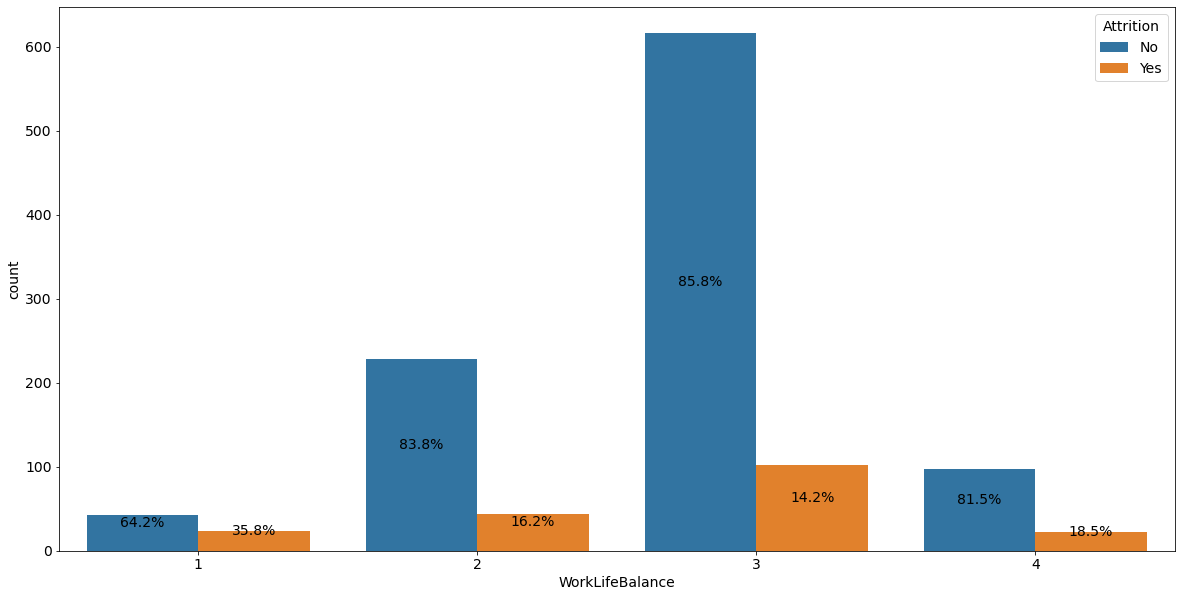

In [167]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['WorkLifeBalance'],hue=df['Attrition'])
i=1


for p in ax.patches:
    total = len(df[df['WorkLifeBalance']==i])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    i=i+1
    

    if i>4:
        i=1
        
plt.show()

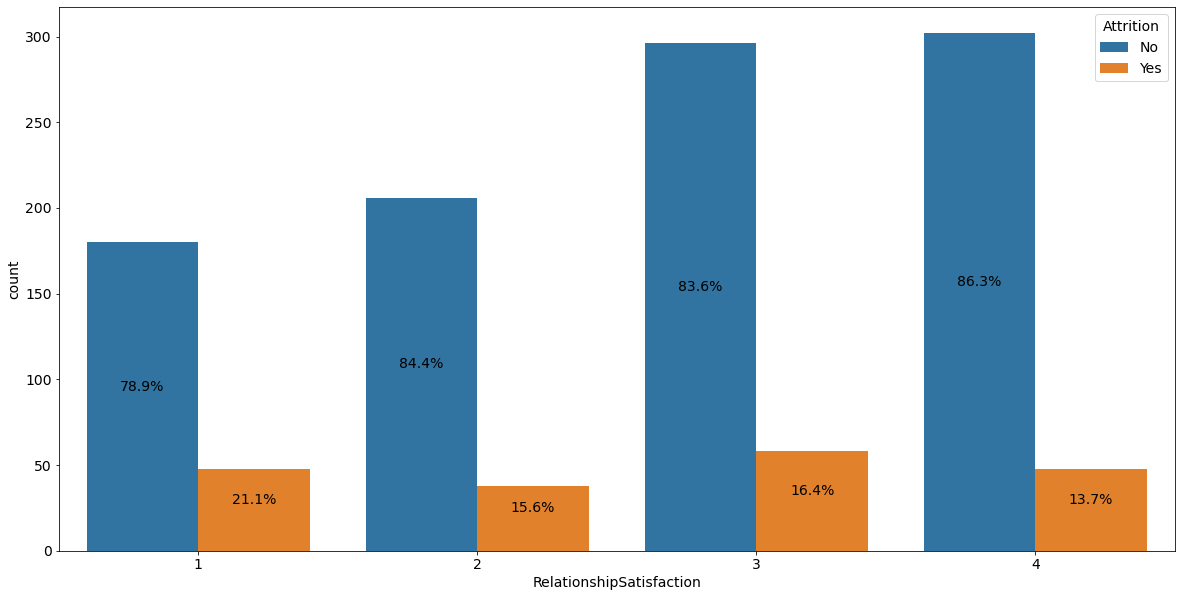

In [168]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['RelationshipSatisfaction'],hue=df['Attrition'])
i=1


for p in ax.patches:
    total = len(df[df['RelationshipSatisfaction']==i])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    i=i+1
    

    if i>4:
        i=1
        
plt.show()

C:\Users\Federico\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


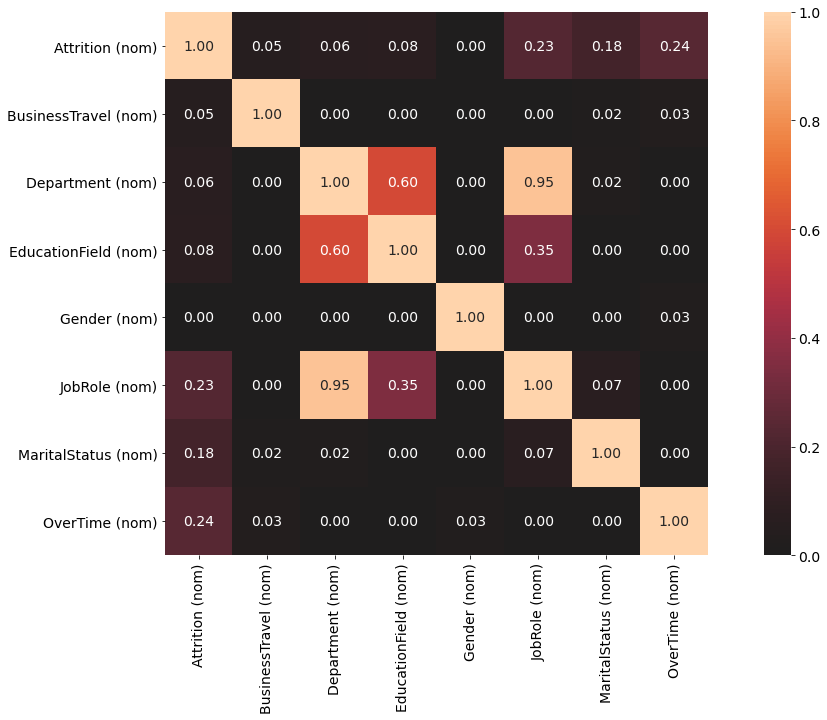

In [169]:
cat_columns=df.select_dtypes(include=["object"]).columns
#Cramer's V correlation for categorical-categorical cases
nominal.associations(df[cat_columns],figsize=(20,10),mark_columns=True);

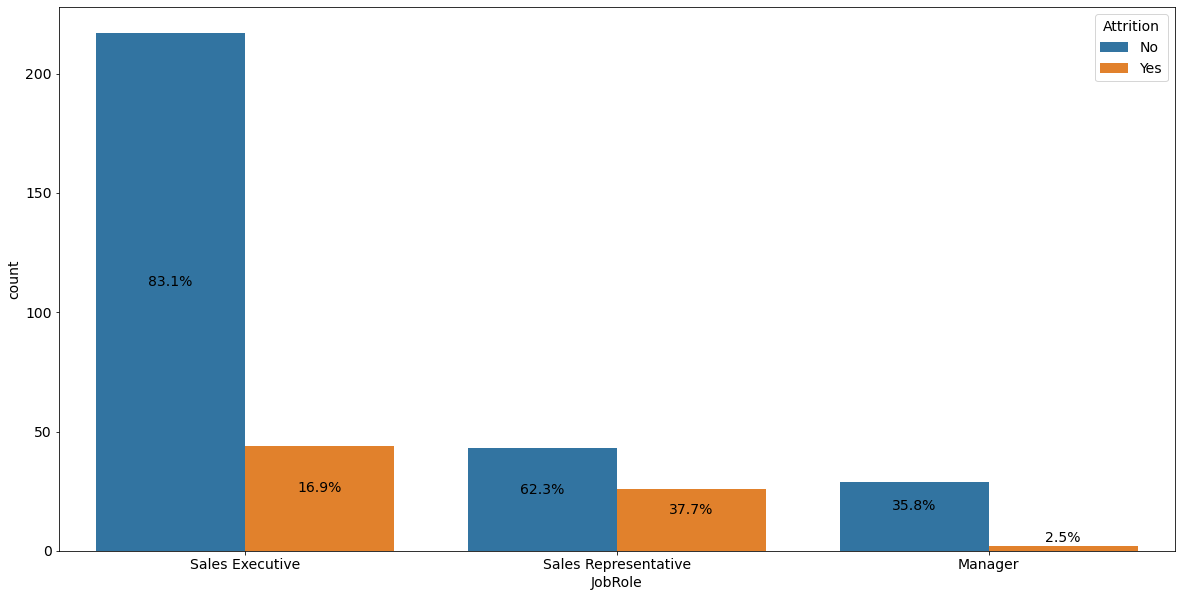

In [172]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df[df['Department']=='Sales']['JobRole'],hue=df['Attrition'])
i=0

value=df[df['Department']=='Sales']['JobRole'].unique()
n=len(value)

for p in ax.patches:
    total = len(df[df['JobRole']==value[i]])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    i=i+1
    
    if i>=n:
        i=0
   
        
plt.show()


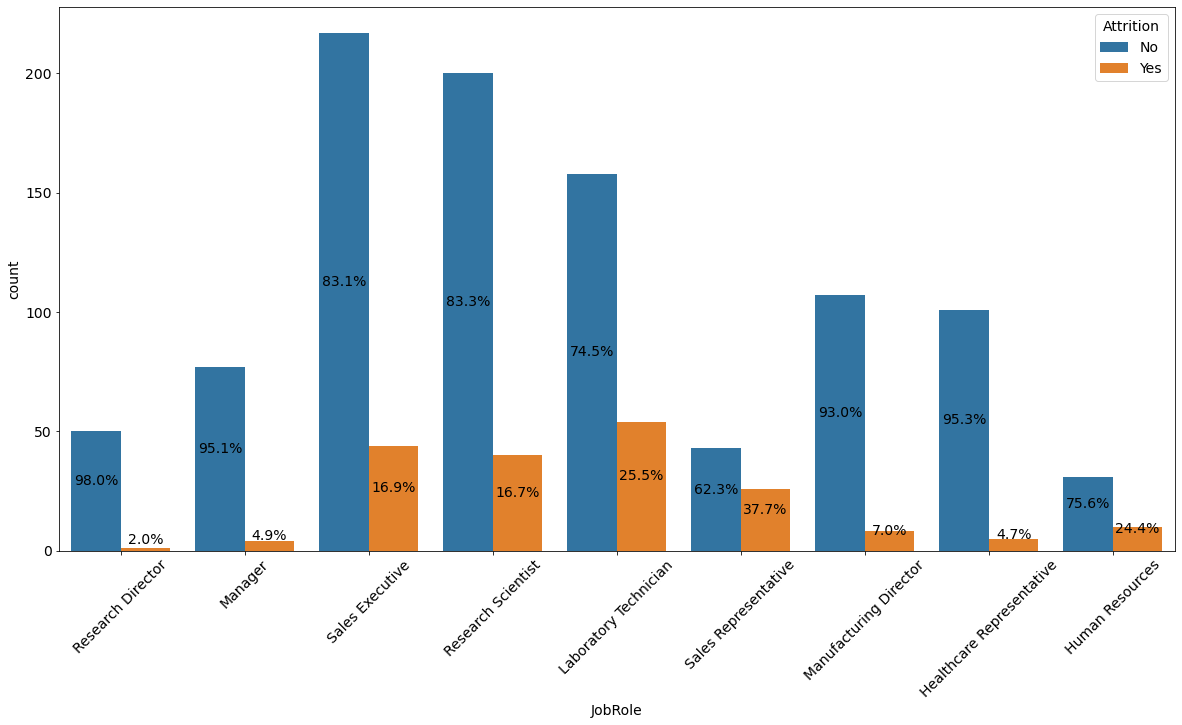

In [175]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df['JobRole'],hue=df['Attrition'])
i=0

value=df['JobRole'].unique()
n=len(value)

for p in ax.patches:
    total = len(df[df['JobRole']==value[i]])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    i=i+1
    
    if i>=n:
        i=0
   
plt.xticks(rotation=45)
       
plt.show()

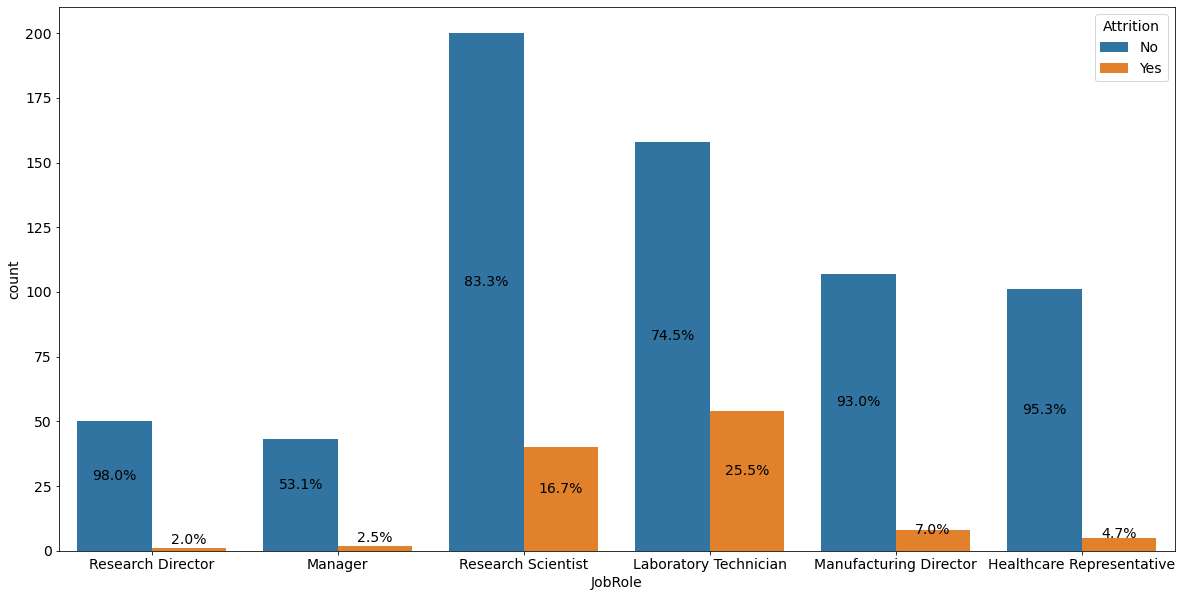

In [179]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df[df['Department']=='Research & Development']['JobRole'],hue=df['Attrition'])
i=0

value=df[df['Department']=='Research & Development']['JobRole'].unique()
n=len(value)

for p in ax.patches:
    total = len(df[df['JobRole']==value[i]])
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    i=i+1
    
    if i>=n:
        i=0
   
        
plt.show()


In [239]:
rows=len(df)
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   float64
 1   Attrition                 1176 non-null   object 
 2   BusinessTravel            1069 non-null   object 
 3   DailyRate                 1176 non-null   int64  
 4   Department                1176 non-null   object 
 5   DistanceFromHome          1176 non-null   int64  
 6   Education                 1176 non-null   int64  
 7   EducationField            1176 non-null   object 
 8   EnvironmentSatisfaction   1176 non-null   int64  
 9   Gender                    1117 non-null   object 
 10  HourlyRate                1176 non-null   int64  
 11  JobInvolvement            1176 non-null   int64  
 12  JobLevel                  1176 non-null   int64  
 13  JobRole                   1176 non-null   object 
 14  JobSatis

In [298]:
row=len(data)
x=[] 
for row in range(0,row):
        if data['NumCompaniesWorked'][row]=='NaN':
            x.append(None)
        elif data['TotalWorkingYears'][row]=='NaN':
            x.append(None)

        else:
            x.append((data['NumCompaniesWorked'][row]) / (data['TotalWorkingYears'][row] +1))       
data['NumCompaniesWorked']=x


In [244]:
 data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,InCompanyRate,WorkExchangeRate
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,0,20,2.0,2,8.0,7,2,13,0.380952,0.428571
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,1,21,3.0,3,1.0,8,1,6,0.045455,0.045455
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,...,1,7,4.0,3,1.0,5,1,2,0.125000,0.125000
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,0,12,1.0,3,3.0,7,0,7,0.230769,0.153846
4,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,0,2,NaN,3,10.0,2,2,1,3.333333,0.333333


In [267]:
row=len(data)
x=[]
y=0
for row in range(0,row):
        if data['YearsAtCompany'][row]=='NaN':
            x.append(None)
        elif data['TotalWorkingYears'][row]=='NaN':
            x.append(None)
        elif data['YearsAtCompany'][row]> data['TotalWorkingYears'][row]:
            x.append(None)
            y=y+1

        else:
            x.append(data['YearsAtCompany'][row] / (data['TotalWorkingYears'][row]+1))       
data['InCompanyRate']=x
print(y)

321


In [272]:
row=len(data)
x=[]

for row in range(0,row):
    try:
        if data['YearsWithCurrManager'][row]=='NaN':
            x.append(None)
        elif data['YearsAtCompany'][row]=='NaN':
            x.append(None)
        elif data['YearsWithCurrManager'][row]> data['YearsAtCompany'][row]:
            x.append(None)
            y=y+1

        else:
        
            x.append(data['YearsAtCompany'][row] / (data['YearsAtCompany'][row]+1))      
    except:
        x.append(None)
data['CurrentManagerInThisCompany']=x

<ipython-input-272-a308271e5938>:10: RuntimeWarning: invalid value encountered in greater
  elif data['YearsWithCurrManager'][row]> data['YearsAtCompany'][row]:


In [245]:
row=len(data)
x=[]
for row in range(0,row):
        if data['YearsInCurrentRole'][row]=='NaN':
            data['YearsInCurrentRole'][row]=1
        if data['YearsAtCompany'][row]=='NaN':
            data['YearsAtCompany'][row]=1
        x.append(data['YearsInCurrentRole'][row] / (data['YearsAtCompany'][row]+1))       
data['CurrentRoleInThisCompany']=x

In [246]:
row=len(data)
x=[]
for row in range(0,row):
        if data['YearsSinceLastPromotion'][row]=='NaN':
            data['YearsSinceLastPromotion'][row]=1
        if data['YearsAtCompany'][row]=='NaN':
            data['YearsAtCompany'][row]=1
        x.append(data['YearsAtCompany'][row] / (data['YearsAtCompany'][row]+1))       
data['LastPromotionInThisCompany']=x

In [265]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,InCompanyRate,WorkExchangeRate,CurrentRoleInThisCompany,LastPromotionInThisCompany,CurrentManagerInThisCompany
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,2,8.0,7,2,13,0.380952,0.428571,0.777778,0.888889,0.888889
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,1.0,8,1,6,0.0454545,0.045455,4.000000,0.500000,0.500000
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,...,3,1.0,5,1,2,0.125,0.125000,2.500000,0.500000,0.500000
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,3,3.0,7,0,7,0.230769,0.153846,1.750000,0.750000,0.750000
4,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,10.0,2,2,1,,0.333333,0.181818,0.909091,0.909091


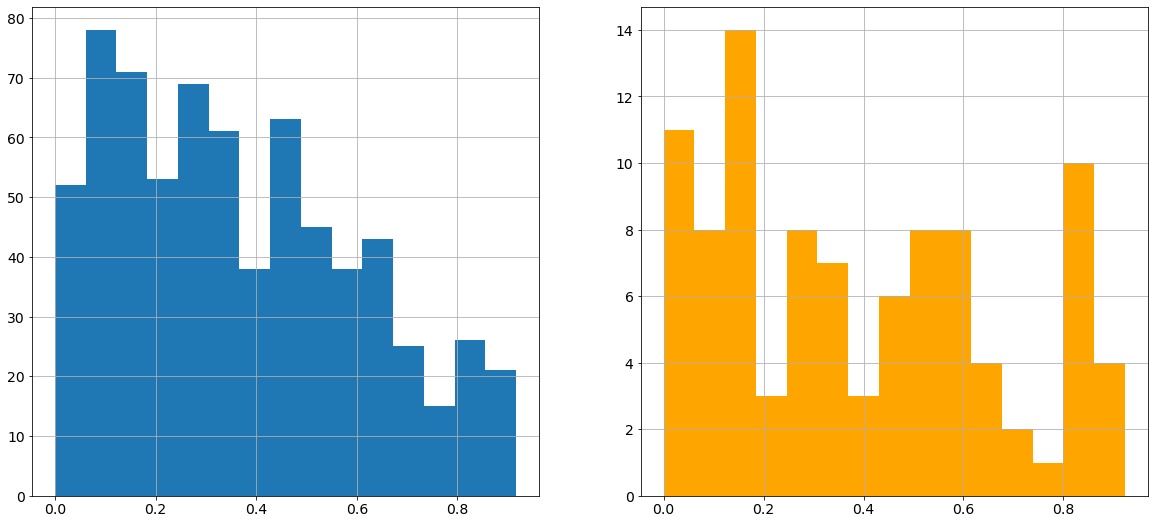

In [268]:
plt.figure(figsize=(20, 9))

plt.subplot(1, 2, 1)
data[data['Attrition'] == "No"]['InCompanyRate'].hist(bins=15)

plt.subplot(1, 2, 2)
data[data['Attrition'] == "Yes"]['InCompanyRate'].hist(bins=15,color='orange')
    
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

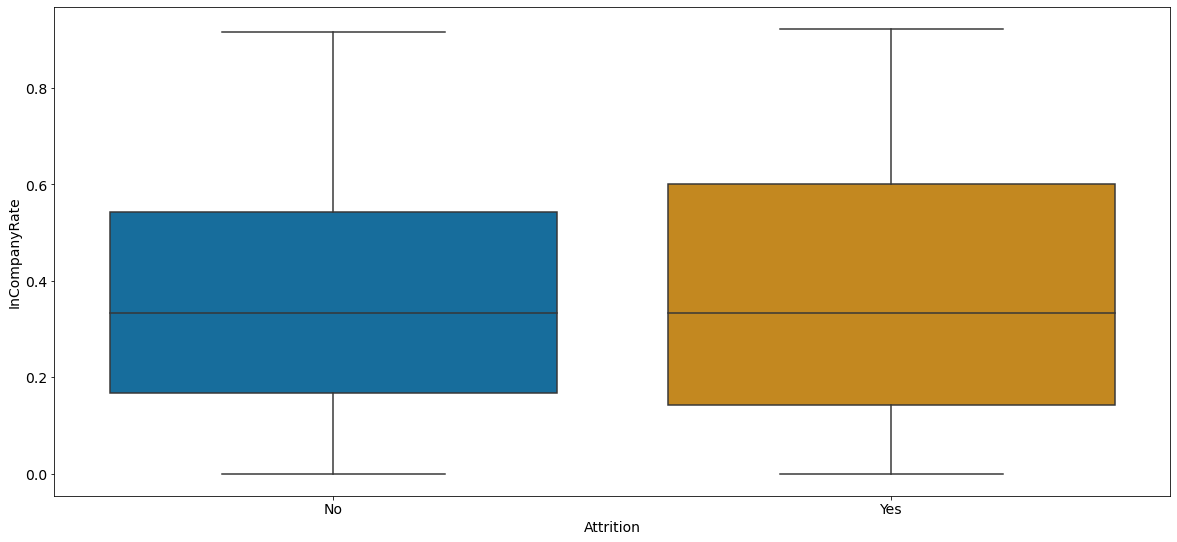

In [269]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='InCompanyRate', data=data, palette="colorblind")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

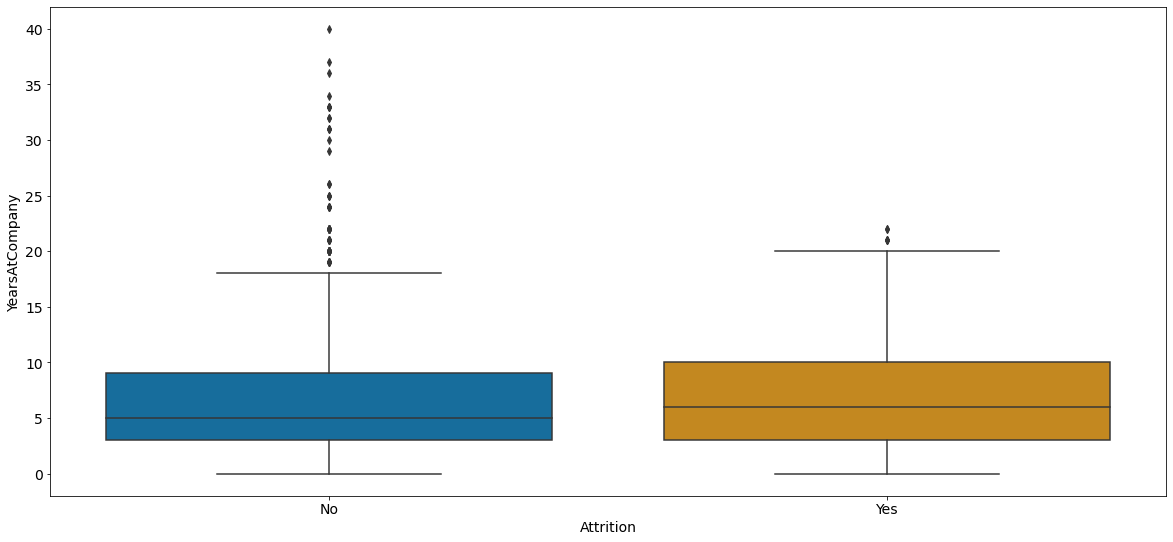

In [256]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='YearsAtCompany', data=data, palette="colorblind")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

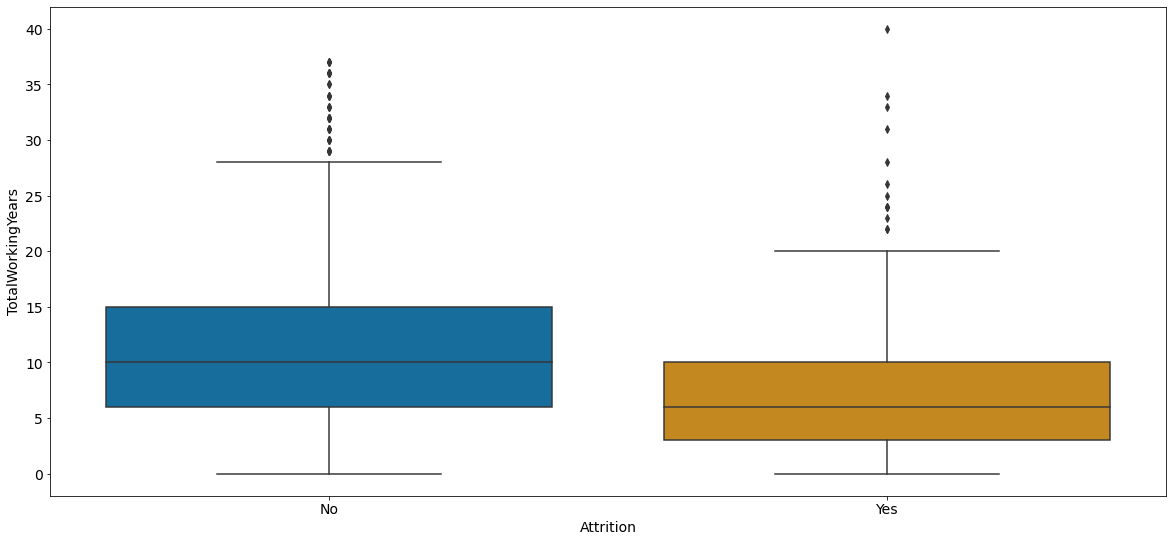

In [257]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='TotalWorkingYears', data=data, palette="colorblind")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

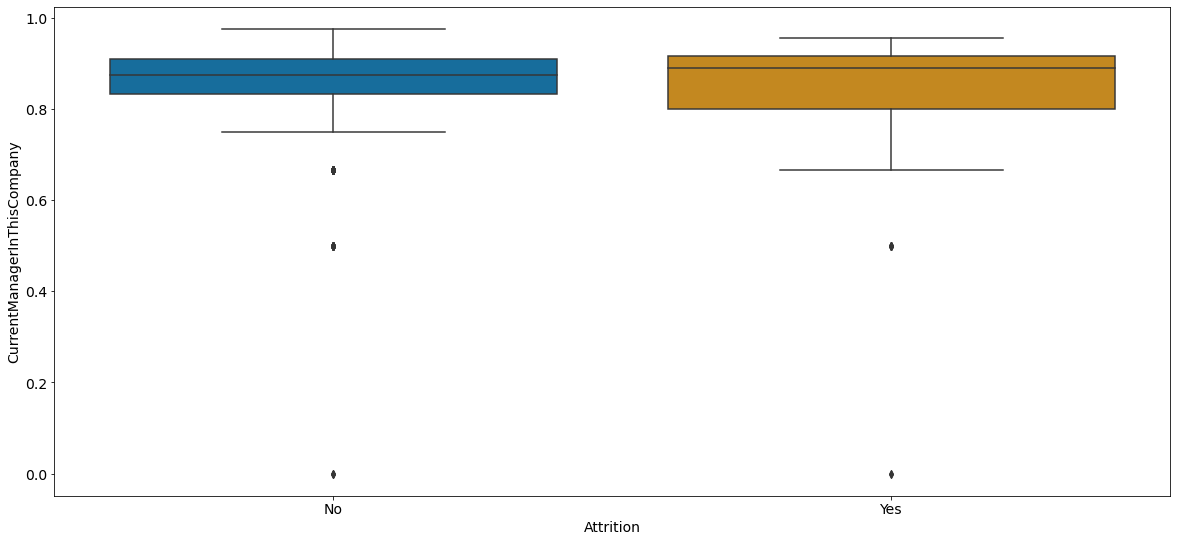

In [273]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='CurrentManagerInThisCompany', data=data, palette="colorblind")
plt.show


In [281]:
y=0
for x in range(0,len(data)):
    if data['YearsWithCurrManager'][x]> data['YearsAtCompany'][x]:
        y=y+1
print(y)

361


<ipython-input-281-884052daa848>:3: RuntimeWarning: invalid value encountered in greater
  if data['YearsWithCurrManager'][x]> data['YearsAtCompany'][x]:


In [277]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,InCompanyRate,WorkExchangeRate,CurrentRoleInThisCompany,LastPromotionInThisCompany,CurrentManagerInThisCompany
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,2,8.0,7,2,13,0.380952,0.428571,0.777778,0.888889,NaN
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,1.0,8,1,6,0.045455,0.045455,4.000000,0.500000,NaN
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,...,3,1.0,5,1,2,0.125000,0.125000,2.500000,0.500000,NaN
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,3,3.0,7,0,7,0.230769,0.153846,1.750000,0.750000,NaN
4,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,10.0,2,2,1,NaN,0.333333,0.181818,0.909091,0.909091


In [283]:
y=0
for x in range(0,len(data)):
    if data['YearsAtCompany'][x]> data['TotalWorkingYears'][x]:
        y=y+1
print(y)

321


In [284]:
y=0
for x in range(0,len(data)):
    if data['YearsSinceLastPromotion'][x]> data['YearsAtCompany'][x]:
        y=y+1
print(y)

169


<ipython-input-284-9702304f2a9e>:3: RuntimeWarning: invalid value encountered in greater
  if data['YearsSinceLastPromotion'][x]> data['YearsAtCompany'][x]:


In [285]:
y=0
for x in range(0,len(data)):
    if data['YearsInCurrentRole'][x]> data['TotalWorkingYears'][x]:
        y=y+1
print(y)

0


In [286]:
y=0
for x in range(0,len(data)):
    if data['YearsInCurrentRole'][x]> data['YearsAtCompany'][x]:
        y=y+1
print(y)

369


<ipython-input-286-1d8ca345104f>:3: RuntimeWarning: invalid value encountered in greater
  if data['YearsInCurrentRole'][x]> data['YearsAtCompany'][x]:


In [287]:
y=0
for x in range(0,len(data)):
    if data['YearsSinceLastPromotion'][x]> data['TotalWorkingYears'][x]:
        y=y+1
print(y)

0


In [288]:
y=0
for x in range(0,len(data)):
    if data['YearsWithCurrManager'][x]> data['TotalWorkingYears'][x]:
        y=y+1
print(y)

0


In [289]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   float64
 1   Attrition                    1176 non-null   object 
 2   BusinessTravel               1069 non-null   object 
 3   DailyRate                    1176 non-null   int64  
 4   Department                   1176 non-null   object 
 5   DistanceFromHome             1176 non-null   int64  
 6   Education                    1176 non-null   int64  
 7   EducationField               1176 non-null   object 
 8   EnvironmentSatisfaction      1176 non-null   int64  
 9   Gender                       1117 non-null   object 
 10  HourlyRate                   1176 non-null   int64  
 11  JobInvolvement               1176 non-null   int64  
 12  JobLevel                     1176 non-null   int64  
 13  JobRole           

<function matplotlib.pyplot.show(*args, **kw)>

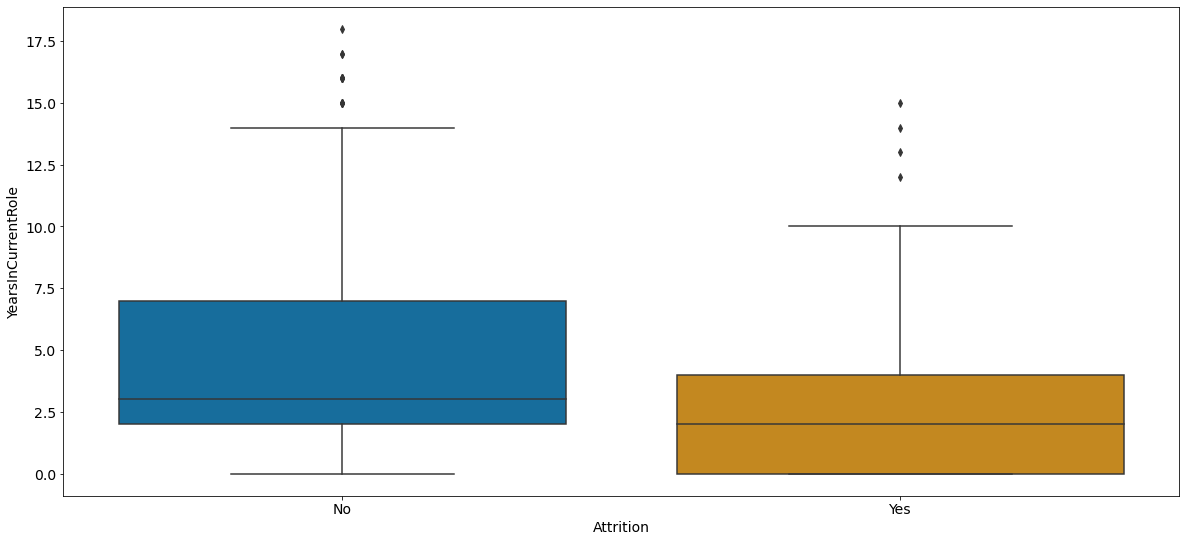

In [290]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='YearsInCurrentRole', data=data, palette="colorblind")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

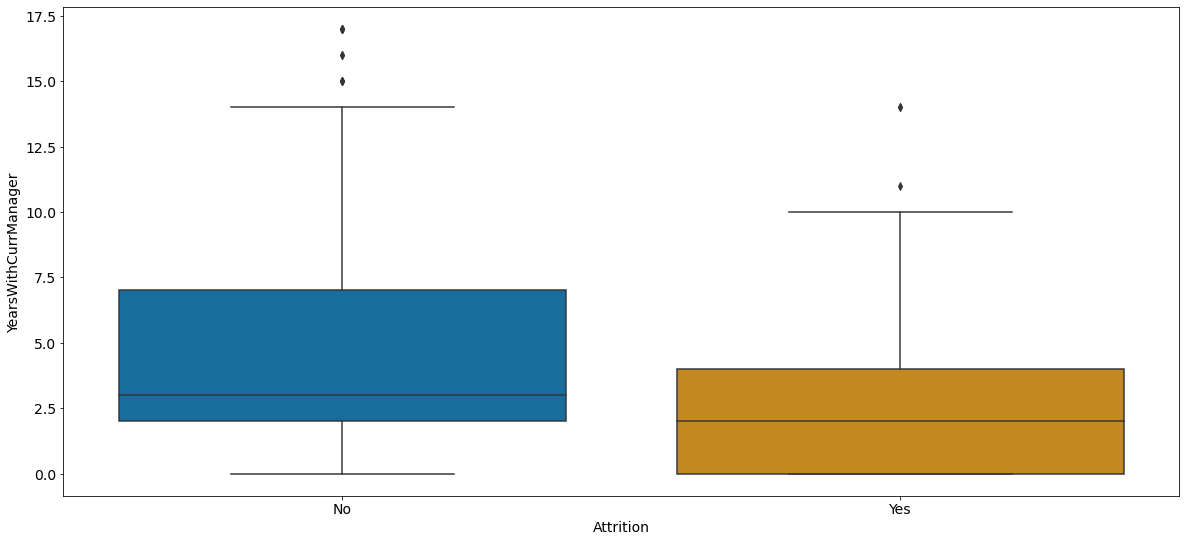

In [291]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='YearsWithCurrManager', data=data, palette="colorblind")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

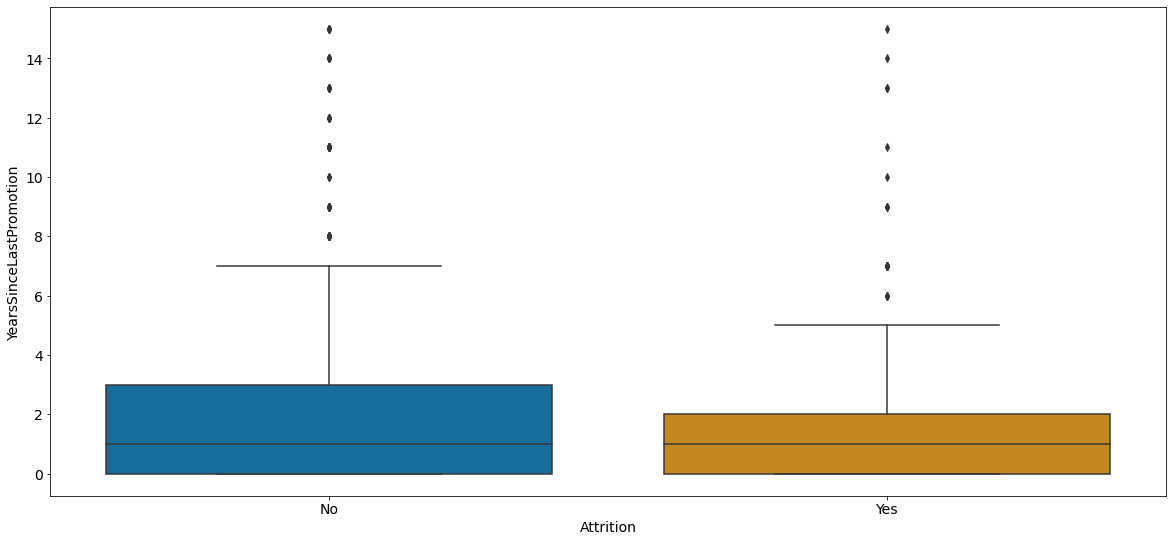

In [292]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='YearsSinceLastPromotion', data=data, palette="colorblind")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

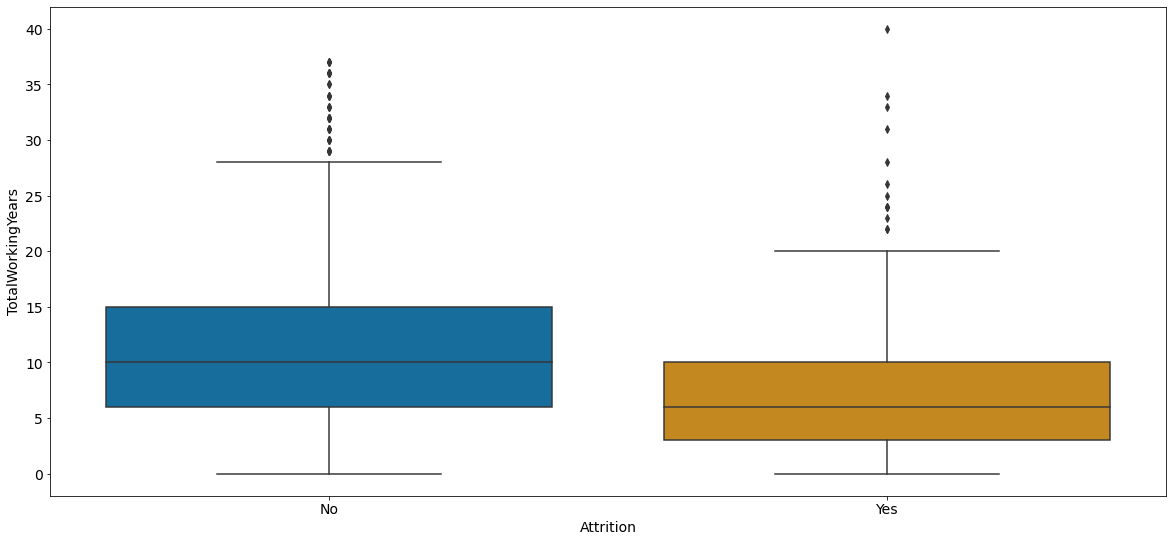

In [293]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='TotalWorkingYears', data=data, palette="colorblind")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

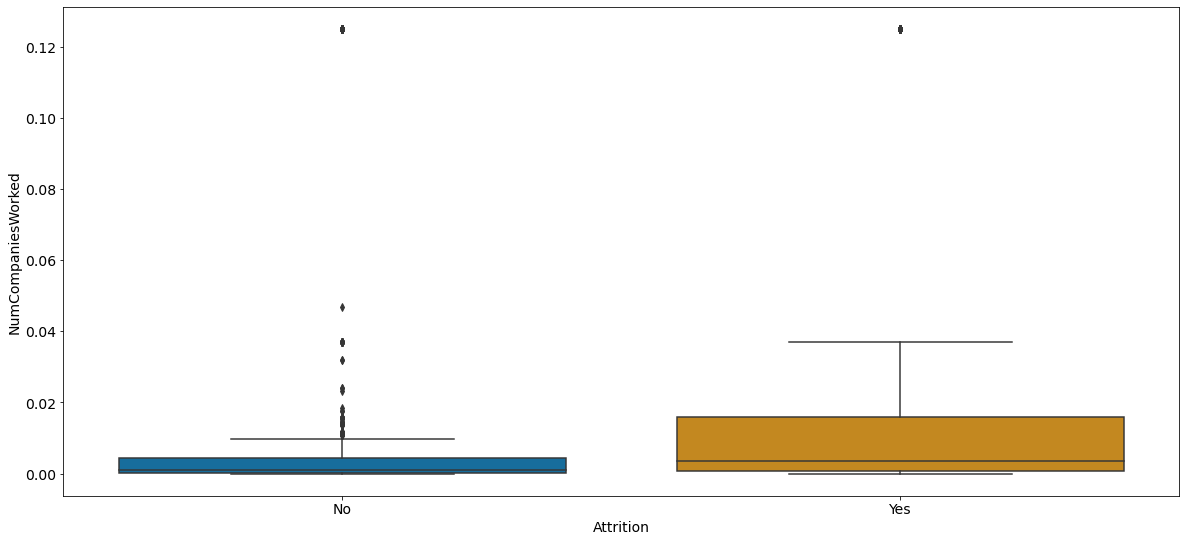

In [299]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='NumCompaniesWorked', data=data, palette="colorblind")
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

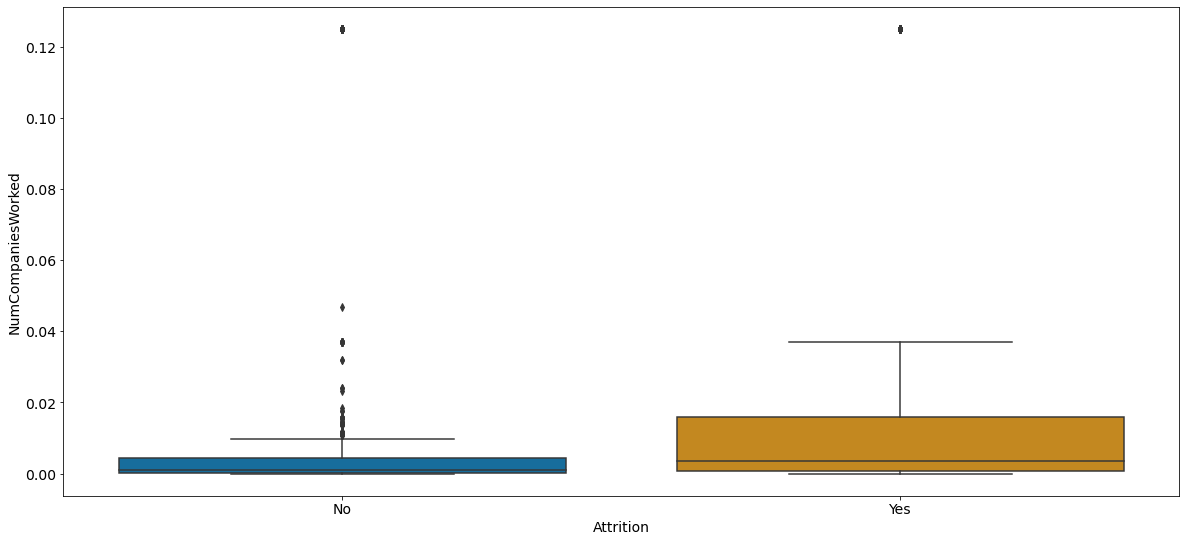

In [300]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='NumCompaniesWorked', data=data, palette="colorblind")
plt.show


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1000.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,963.000000,...,1176.000000,606.0,1176.000000,1176.000000,943.000000,1176.000000,1116.000000,1176.000000,1176.000000,1176.000000
mean,37.199000,803.650510,9.210034,2.884354,2.715986,66.299320,2.735544,2.021259,2.702381,6565.946002,...,2.702381,80.0,0.783163,11.019558,2.827147,2.755952,6.926523,4.188776,2.171769,4.107993
std,9.015802,406.683045,8.097024,1.016574,1.088876,20.266116,0.716228,1.069686,1.101578,4710.625603,...,1.092268,0.0,0.851385,7.694848,1.273120,0.707984,6.063193,3.637405,3.189785,3.601097
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,460.500000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2969.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,804.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4969.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1169.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8585.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
soldi=df[["HourlyRate","DailyRate","MonthlyRate","MonthlyIncome"]]
soldi.head()


,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome
0,88,593,13782,8446.0
1,52,1218,8213,4834.0
2,36,530,16130,4768.0
3,65,953,17674,2799.0
4,75,1380,6319,7978.0


In [14]:
soldi.describe()

,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome
count,1176.000000,1176.000000,1176.000000,963.000000
mean,66.299320,803.650510,14395.836735,6565.946002
std,20.266116,406.683045,7111.845106,4710.625603
min,30.000000,102.000000,2097.000000,1009.000000
25%,49.000000,460.500000,8227.250000,2969.000000
50%,66.000000,804.000000,14434.000000,4969.000000
75%,84.000000,1169.000000,20489.250000,8585.000000
max,100.000000,1499.000000,26999.000000,19999.000000


In [15]:
soldi.corr()

,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome
HourlyRate,1.000000,0.007709,-0.010387,-0.014530
DailyRate,0.007709,1.000000,-0.031826,-0.030414
MonthlyRate,-0.010387,-0.031826,1.000000,0.015936
MonthlyIncome,-0.014530,-0.030414,0.015936,1.000000


In [21]:
df['BusinessTravel'].value_counts()

Travel_Rarely        764
Travel_Frequently    192
Non-Travel           113
Name: BusinessTravel, dtype: int64

In [7]:
df.isnull().sum()

Age                         176
Attrition                     0
BusinessTravel              107
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                       59
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               213
MonthlyRate                   0
NumCompaniesWorked            0
Over18                      372
OverTime                      0
PercentSalaryHike             0
PerformanceRating           138
RelationshipSatisfaction      0
StandardHours               570
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear       233
WorkLifeBalance               0
YearsAtCompany               60
YearsInCurrentRole            0
YearsSin

In [8]:
JobAge=pd.DataFrame(df.groupby("JobRole")[["Age"]].mean())
#JobAge["Count"]=df.Age.value_counts(dropna=False)
JobAge.reset_index(level=0, inplace=True)
JobAge.head()

,JobRole,Age
0,Healthcare Representative,38.211111
1,Human Resources,36.777778
2,Laboratory Technician,37.417582
3,Manager,37.507246
4,Manufacturing Director,36.383178


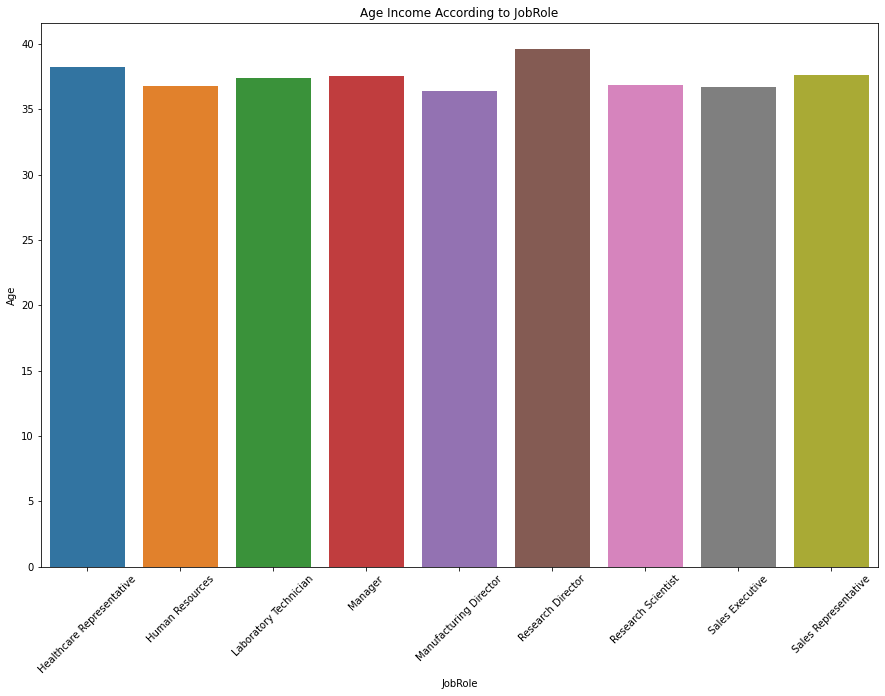

In [10]:
plt.figure(figsize=(15,10))
sns.barplot(x=JobAge['JobRole'],y=JobAge['Age'])
plt.ylabel("Age")
plt.title("Age Income According to JobRole")
plt.xticks(rotation=45)
plt.show()

In [14]:
df['Age'].mode()

0    34.0
1    35.0
dtype: float64

In [19]:
int(df['Age'].mean())

37

In [20]:
df['BusinessTravel'].value_counts()

Travel_Rarely        764
Travel_Frequently    192
Non-Travel           113
Name: BusinessTravel, dtype: int64

In [24]:
764/(764+192+113)

0.7146866230121609

In [25]:
df['Gender'].mode()

0    Male
dtype: object

In [26]:
df['Gender'].value_counts()

Male      664
Female    453
Name: Gender, dtype: int64

In [72]:
JobGender=pd.DataFrame(df.groupby(['JobRole', 'Gender']).size())

JobGender.reset_index(level=0, inplace=True)
JobGender.head()


,JobRole,0
Gender,,
Female,Healthcare Representative,34
Male,Healthcare Representative,65
Female,Human Resources,16
Male,Human Resources,23
Female,Laboratory Technician,91


In [77]:
job=JobGender["JobRole"].unique()

In [85]:

for i in job: 
    j=JobGender[JobGender["JobRole"]== i]
    total= j[x][0]+j[x][1]
    print ("{} : Female:{}   Male:{}".format(i,j[0][0]*100/total,j[0][1]*100/total))
    

Healthcare Representative : Female:34.343434343434346   Male:65.65656565656566
Human Resources : Female:41.02564102564103   Male:58.97435897435897
Laboratory Technician : Female:45.04950495049505   Male:54.95049504950495
Manager : Female:42.857142857142854   Male:57.142857142857146
Manufacturing Director : Female:40.36697247706422   Male:59.63302752293578
Research Director : Female:37.5   Male:62.5
Research Scientist : Female:44.24778761061947   Male:55.75221238938053
Sales Executive : Female:37.2   Male:62.8
Sales Representative : Female:35.82089552238806   Male:64.17910447761194


In [74]:
for i in job:
    print(JobGender[JobGender["JobRole"]== i]["Healthcare Representative"][0]+JobGender[JobGender["JobRole"]== i][0][1])
 

KeyError: 'Healthcare Representative'

In [83]:
x=0
j=JobGender[JobGender["JobRole"]== "Healthcare Representative"]
print( j[0][2]+j[0][3])

IndexError: index out of bounds

In [87]:
df['Gender'].value_counts()

Male      664
Female    453
Name: Gender, dtype: int64

In [94]:
print("male: {}, female {}".format((664/(664+453)),(453/(664+453))))

male: 0.594449418084154, female 0.40555058191584603


In [93]:
664/664+453

454.0

In [96]:
df['MonthlyIncome'].mode()


0    2342.0
1    2380.0
2    2741.0
3    5562.0
dtype: float64

In [108]:
print("Age < 30: {}".format(df[df["Age"]<30]["MonthlyIncome"].mean()))
print("30 <= Age < 40: {}".format(df[(df["Age"]>=30) & (df["Age"]<40)]["MonthlyIncome"].mean()))
print("40 <= Age < 50: {}".format(df[(df["Age"]>=40) & (df["Age"]<50)]["MonthlyIncome"].mean()))
print("50 <= Age < 60: {}".format(df[(df["Age"]>=50) & (df["Age"]<60)]["MonthlyIncome"].mean()))


Age < 30: 3544.9112426035504
30 <= Age < 40: 5698.427325581395
40 <= Age < 50: 8847.699029126214
50 <= Age < 60: 10900.264705882353


30 <= Age < 40: 5698.427325581395


In [110]:
df['PerformanceRating'].value_counts()


3.0    880
4.0    158
Name: PerformanceRating, dtype: int64

In [111]:
880/(880+158)

0.8477842003853564

In [112]:
df['TrainingTimesLastYear'].value_counts()

2.0    339
3.0    326
5.0     82
4.0     82
1.0     44
6.0     38
0.0     32
Name: TrainingTimesLastYear, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

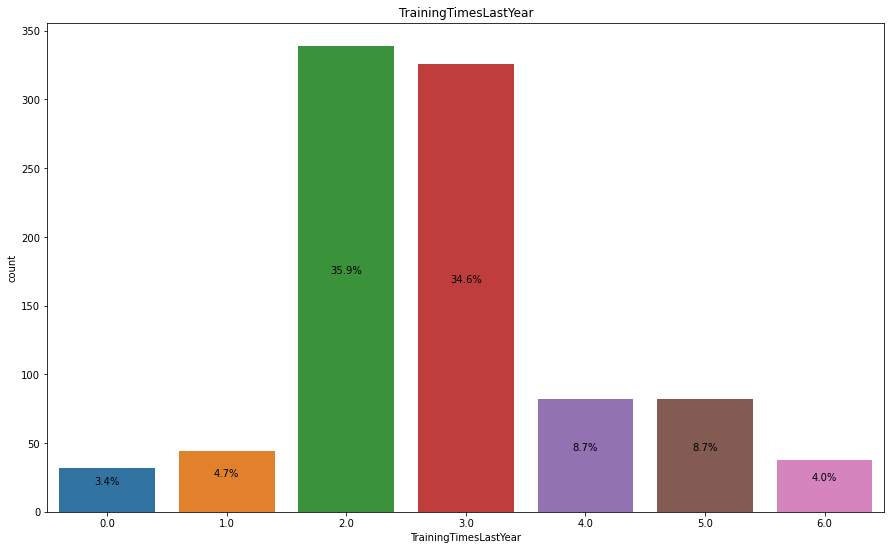

In [115]:
plt.figure(figsize=(15, 9))
ax=sns.countplot(df['TrainingTimesLastYear'])
total = len(df['TrainingTimesLastYear'])-233
for p in ax.patches:
    
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
plt.title('TrainingTimesLastYear')
#plt.xticks(rotation=90);
plt.show

In [116]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1000.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,963.000000,...,1176.000000,606.0,1176.000000,1176.000000,943.000000,1176.000000,1116.000000,1176.000000,1176.000000,1176.000000
mean,37.199000,803.650510,9.210034,2.884354,2.715986,66.299320,2.735544,2.021259,2.702381,6565.946002,...,2.702381,80.0,0.783163,11.019558,2.827147,2.755952,6.926523,4.188776,2.171769,4.107993
std,9.015802,406.683045,8.097024,1.016574,1.088876,20.266116,0.716228,1.069686,1.101578,4710.625603,...,1.092268,0.0,0.851385,7.694848,1.273120,0.707984,6.063193,3.637405,3.189785,3.601097
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,460.500000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2969.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,804.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4969.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1169.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8585.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [119]:
lavori=df[["TotalWorkingYears","NumCompaniesWorked"]]
lavori.describe()

,TotalWorkingYears,NumCompaniesWorked
count,1176.000000,1176.000000
mean,11.019558,2.663265
std,7.694848,2.491287
min,0.000000,0.000000
25%,6.000000,1.000000
50%,10.000000,2.000000
75%,15.000000,4.000000
max,40.000000,9.000000


In [137]:
prova=df.copy()
row=len(lavori)
x=[] 
for row in range(0,row):
    x.append((prova['NumCompaniesWorked'][row])+1 / (prova['TotalWorkingYears'][row]+1))       
prova['ChangeCompanyRate']=x

In [138]:
prova.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ChangeCompanyRate
count,1000.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,963.000000,...,606.0,1176.000000,1176.000000,943.000000,1176.000000,1116.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,37.199000,803.650510,9.210034,2.884354,2.715986,66.299320,2.735544,2.021259,2.702381,6565.946002,...,80.0,0.783163,11.019558,2.827147,2.755952,6.926523,4.188776,2.171769,4.107993,2.802093
std,9.015802,406.683045,8.097024,1.016574,1.088876,20.266116,0.716228,1.069686,1.101578,4710.625603,...,0.0,0.851385,7.694848,1.273120,0.707984,6.063193,3.637405,3.189785,3.601097,2.459543
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.026316
25%,30.000000,460.500000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2969.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.090909
50%,36.000000,804.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4969.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,2.030777
75%,43.000000,1169.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8585.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,4.090909
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,9.250000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   float64
 1   Attrition                 1176 non-null   object 
 2   BusinessTravel            1069 non-null   object 
 3   DailyRate                 1176 non-null   int64  
 4   Department                1176 non-null   object 
 5   DistanceFromHome          1176 non-null   int64  
 6   Education                 1176 non-null   int64  
 7   EducationField            1176 non-null   object 
 8   EnvironmentSatisfaction   1176 non-null   int64  
 9   Gender                    1117 non-null   object 
 10  HourlyRate                1176 non-null   int64  
 11  JobInvolvement            1176 non-null   int64  
 12  JobLevel                  1176 non-null   int64  
 13  JobRole                   1176 non-null   object 
 14  JobSatis

<function matplotlib.pyplot.show(*args, **kw)>

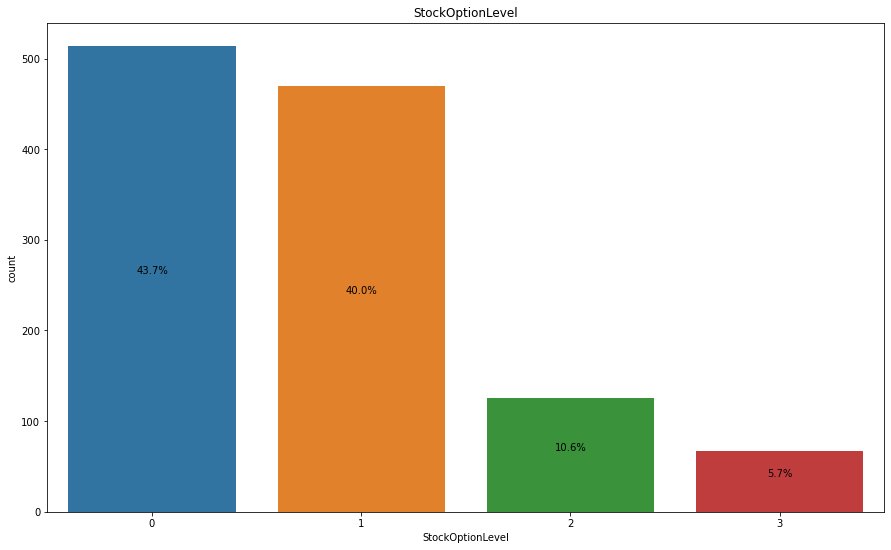

In [124]:
plt.figure(figsize=(15, 9))
ax=sns.countplot(df['StockOptionLevel'])
total = len(df['StockOptionLevel'])
for p in ax.patches:
    
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, 
                xy=(p.get_x() + p.get_width() / 2, p.get_height()/2),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
plt.title('StockOptionLevel')
#plt.xticks(rotation=90);
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

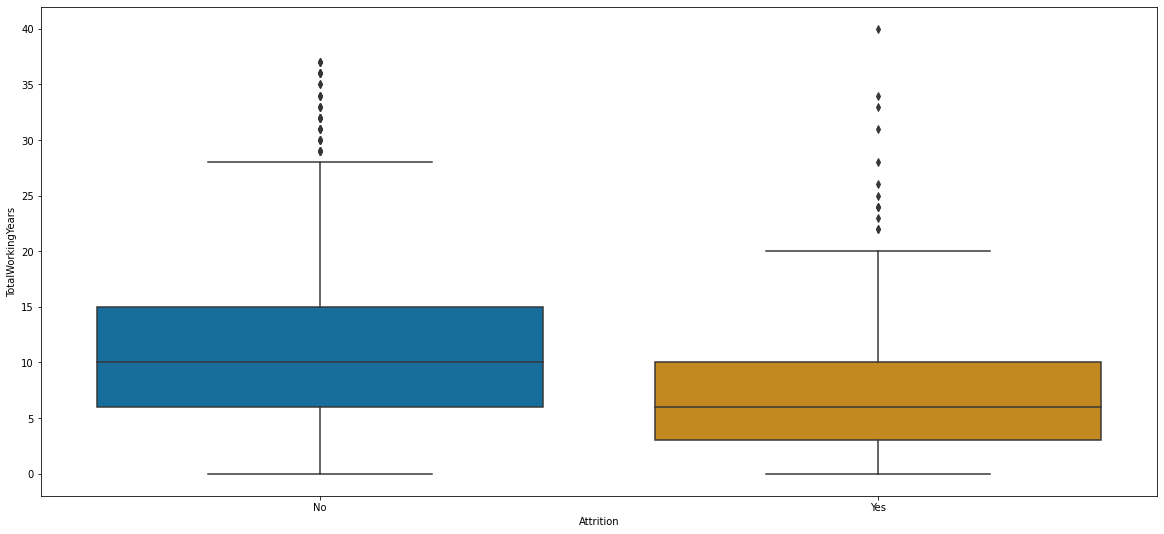

In [126]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='TotalWorkingYears', data=df, palette="colorblind")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

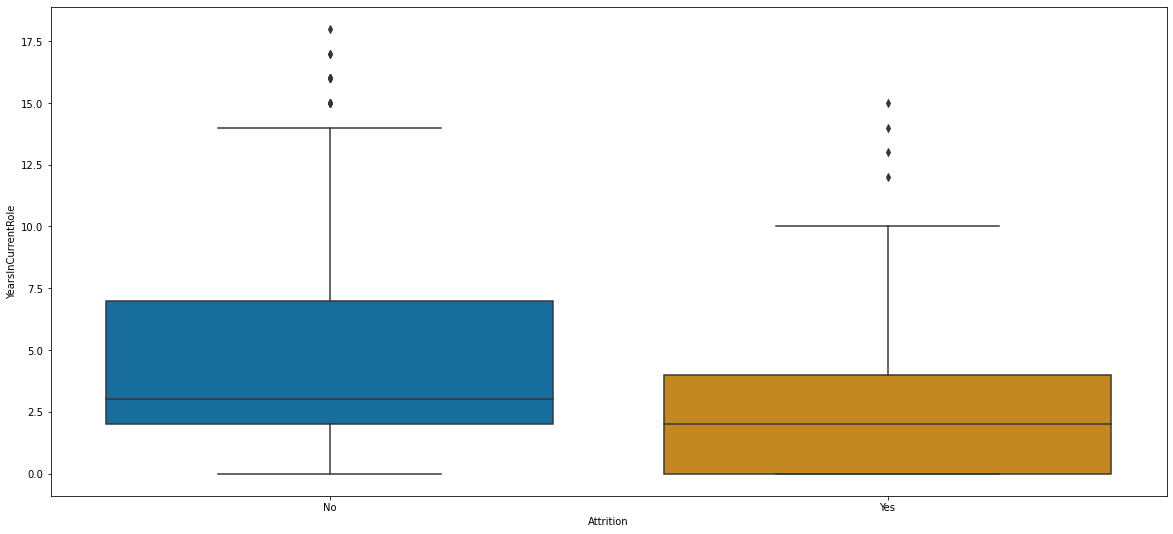

In [128]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='YearsInCurrentRole', data=df, palette="colorblind")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

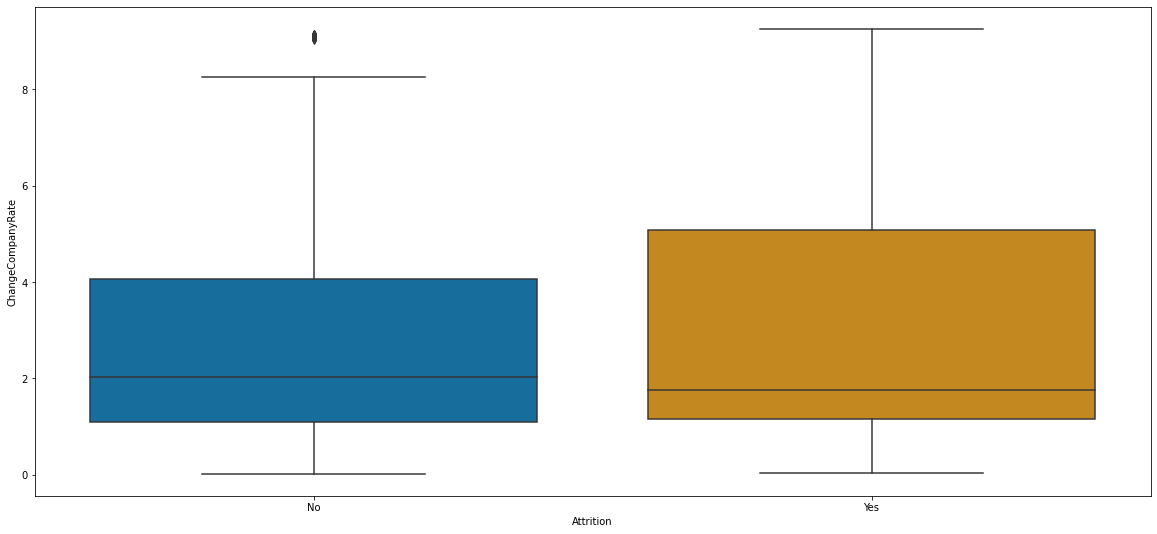

In [140]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='ChangeCompanyRate', data=prova, palette="colorblind")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

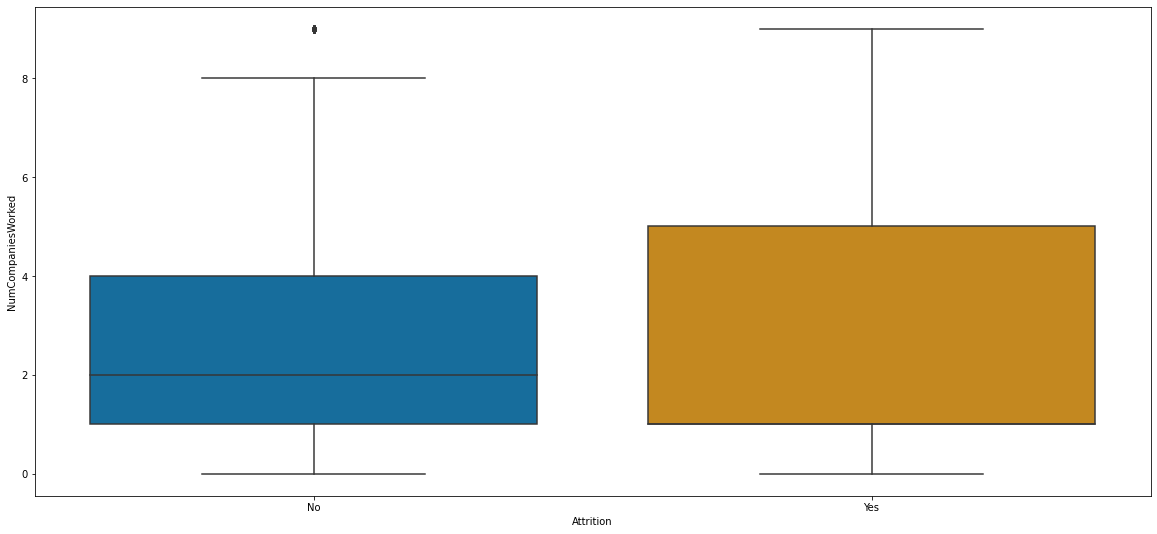

In [131]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='NumCompaniesWorked', data=prova, palette="colorblind")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

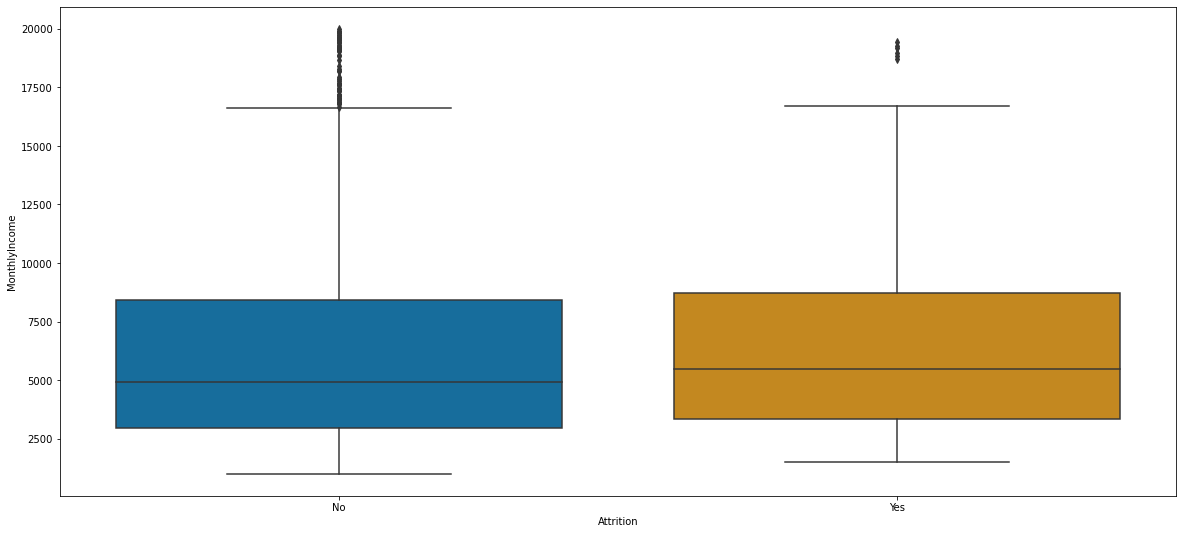

In [132]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='MonthlyIncome', data=df, palette="colorblind")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

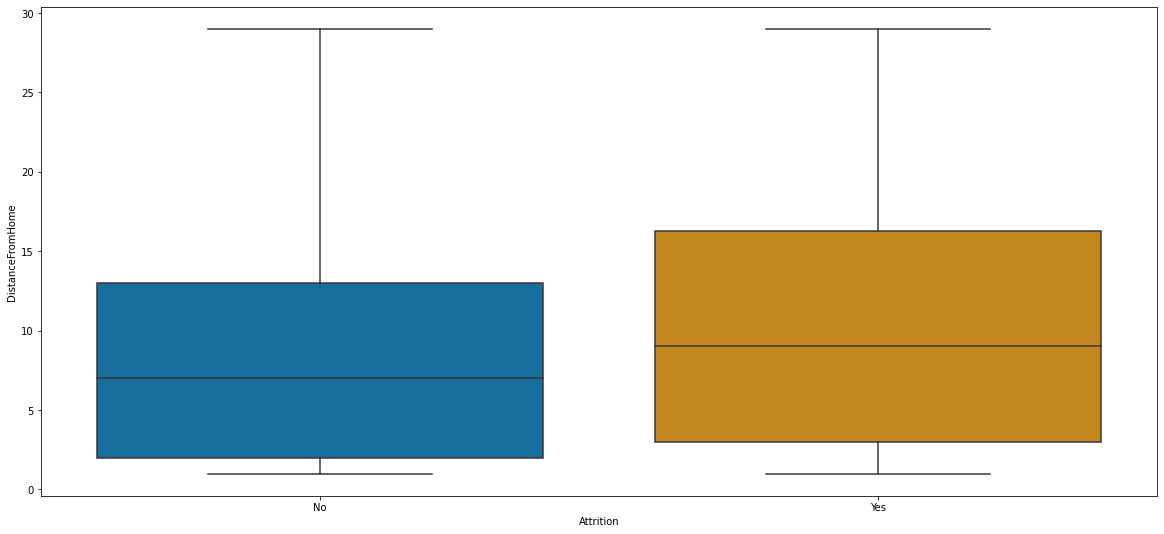

In [133]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='DistanceFromHome', data=df, palette="colorblind")
plt.show


In [141]:
df[["NumCompaniesWorked",'TotalWorkingYears']].describe()

,NumCompaniesWorked,TotalWorkingYears
count,1176.000000,1176.000000
mean,2.663265,11.019558
std,2.491287,7.694848
min,0.000000,0.000000
25%,1.000000,6.000000
50%,2.000000,10.000000
75%,4.000000,15.000000
max,9.000000,40.000000


In [142]:
prova[["NumCompaniesWorked",'TotalWorkingYears','ChangeCompanyRate']].describe()

,NumCompaniesWorked,TotalWorkingYears,ChangeCompanyRate
count,1176.000000,1176.000000,1176.000000
mean,2.663265,11.019558,2.802093
std,2.491287,7.694848,2.459543
min,0.000000,0.000000,0.026316
25%,1.000000,6.000000,1.090909
50%,2.000000,10.000000,2.030777
75%,4.000000,15.000000,4.090909
max,9.000000,40.000000,9.250000


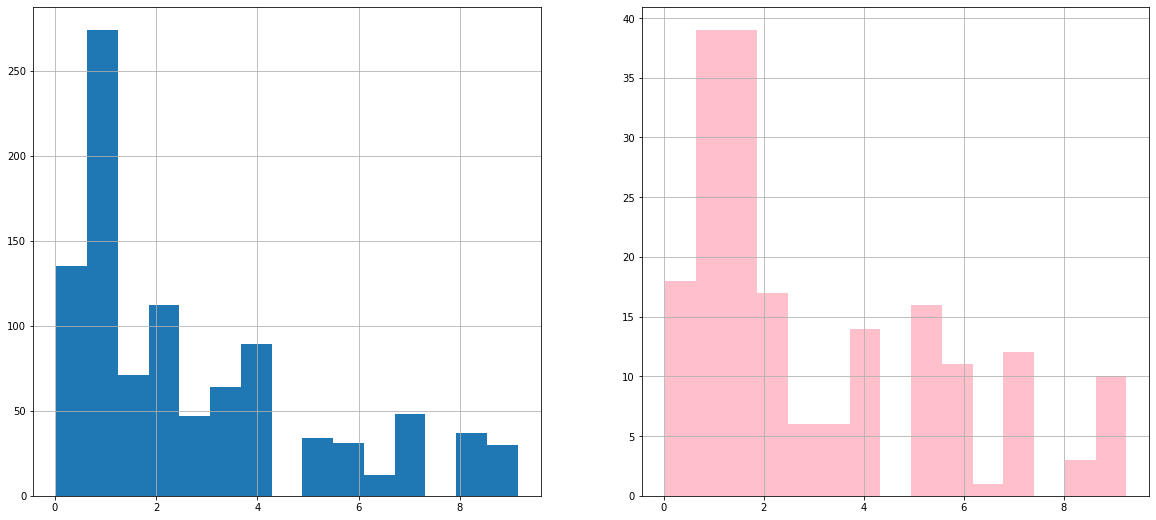

In [143]:
plt.figure(figsize=(20, 9))

plt.subplot(1, 2, 1)
prova[prova['Attrition'] == "No"]['ChangeCompanyRate'].hist(bins=15)


plt.subplot(1, 2, 2)
prova[prova['Attrition'] == "Yes"]['ChangeCompanyRate'].hist(bins=15,color='pink')


plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

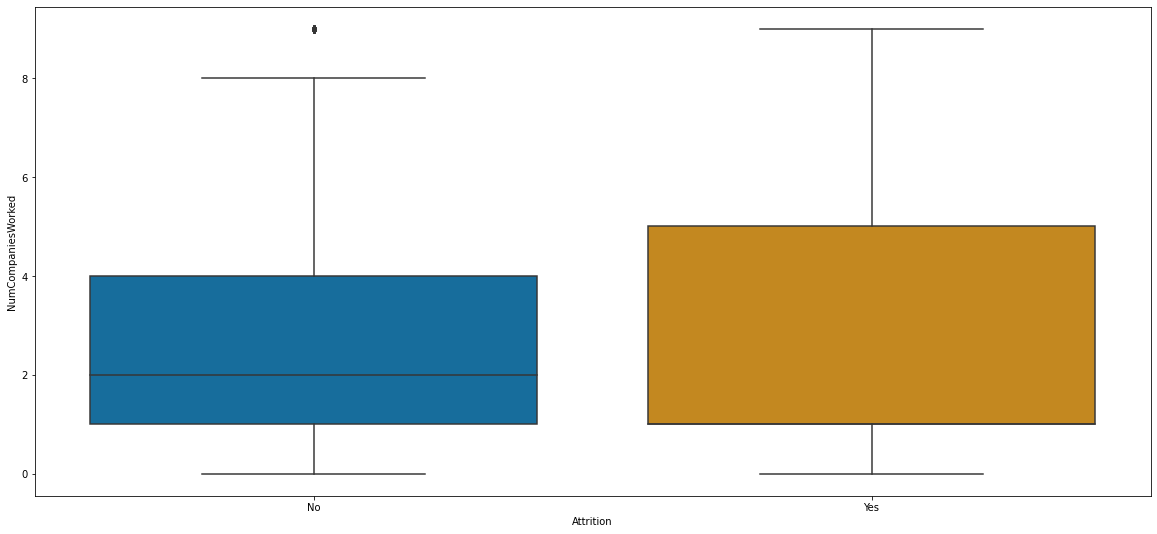

In [144]:
plt.figure(figsize=(20, 9))
sns.boxplot( x='Attrition',y='NumCompaniesWorked', data=prova, palette="colorblind")
plt.show